# CV2 water ice features
We investigate the case of ice contamination during ISIM CV2 testing based on MRS data. The dataset used is that of the OSIM sapphire diffuser measurements, used for the MRS sky flat.

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [1]:
# import modules
import funcs
import mrsobs

import numpy as np
from astropy.io import fits
from matplotlib import pyplot as plt
plt.style.use('presentation')
%matplotlib notebook

import warnings
warnings.simplefilter('ignore')

In [2]:
# Define paths to data
workDir   = '/Users/ioannisa/Desktop/python/miri_devel/'
cdpDir    = workDir+'cdp_data/'
d2cMapDir = workDir+'distortionMaps/'
lvl2path  = workDir+'CV2_data/LVL2/'

In [38]:
pointing = 'CV2_P1'
img_SCI,img_BKG,CV2_intcal_source_sci = {},{},{}
for band in ['1A','1B','1C','2A','2B','2C']:
    # point source
    key = pointing.split('_')[1]
    img_SCI[band],img_BKG[band] = mrsobs.CV_800K_BB_MRS_OPT_02_obs(lvl2path,band,pointing=key,campaign='CV2')
    # internal calibration source
    CV2_intcal_source_sci[band] = mrsobs.MIRI_internal_calibration_source(lvl2path,band,campaign='CV2')

# load MRS distortion information
lambdaMap,xpos = {},{}
for band in ['1A','1B','1C','2A','2B','2C']:
    d2cMaps = funcs.load_obj('d2cMaps_band{}'.format(band),path=d2cMapDir)
    lambdaMap[band] = d2cMaps['lambdaMap']
    ypos,xpos[band] = funcs.detpixel_trace(band,d2cMaps,sliceID=10,alpha_pos=0.)
    
# the alpha distortion information from the DISTORTION CDP v7B.05.00 is inaccurate and yields jumps in the plotted internal calibration source spectrum
# We bypass this issue by using the PSF peak position of a CV2 point source observation
for band in ['1A','1B','1C']:
    d2cMaps   = funcs.load_obj('d2cMaps_band{}'.format(band),path=d2cMapDir)
    key = pointing.split('_')[1]
    CV2_pointings_dict = mrsobs.CV_800K_BB_MRS_OPT_02_obs(lvl2path,band,campaign='CV2')
    point_source_sci,point_source_bkg = fits.open(lvl2path+CV2_pointings_dict[pointing][1])[0].data[0,:,:],fits.open(lvl2path+CV2_pointings_dict[pointing][3])[0].data[0,:,:]
    point_source_bkgsubtr = point_source_sci-point_source_bkg
    
    # optimize the detector pixel trace
    ypos,xpos[band] = funcs.detpixel_trace_compactsource(point_source_bkgsubtr,band,d2cMaps,offset_slice=0,verbose=False)

<IPython.core.display.Javascript object>


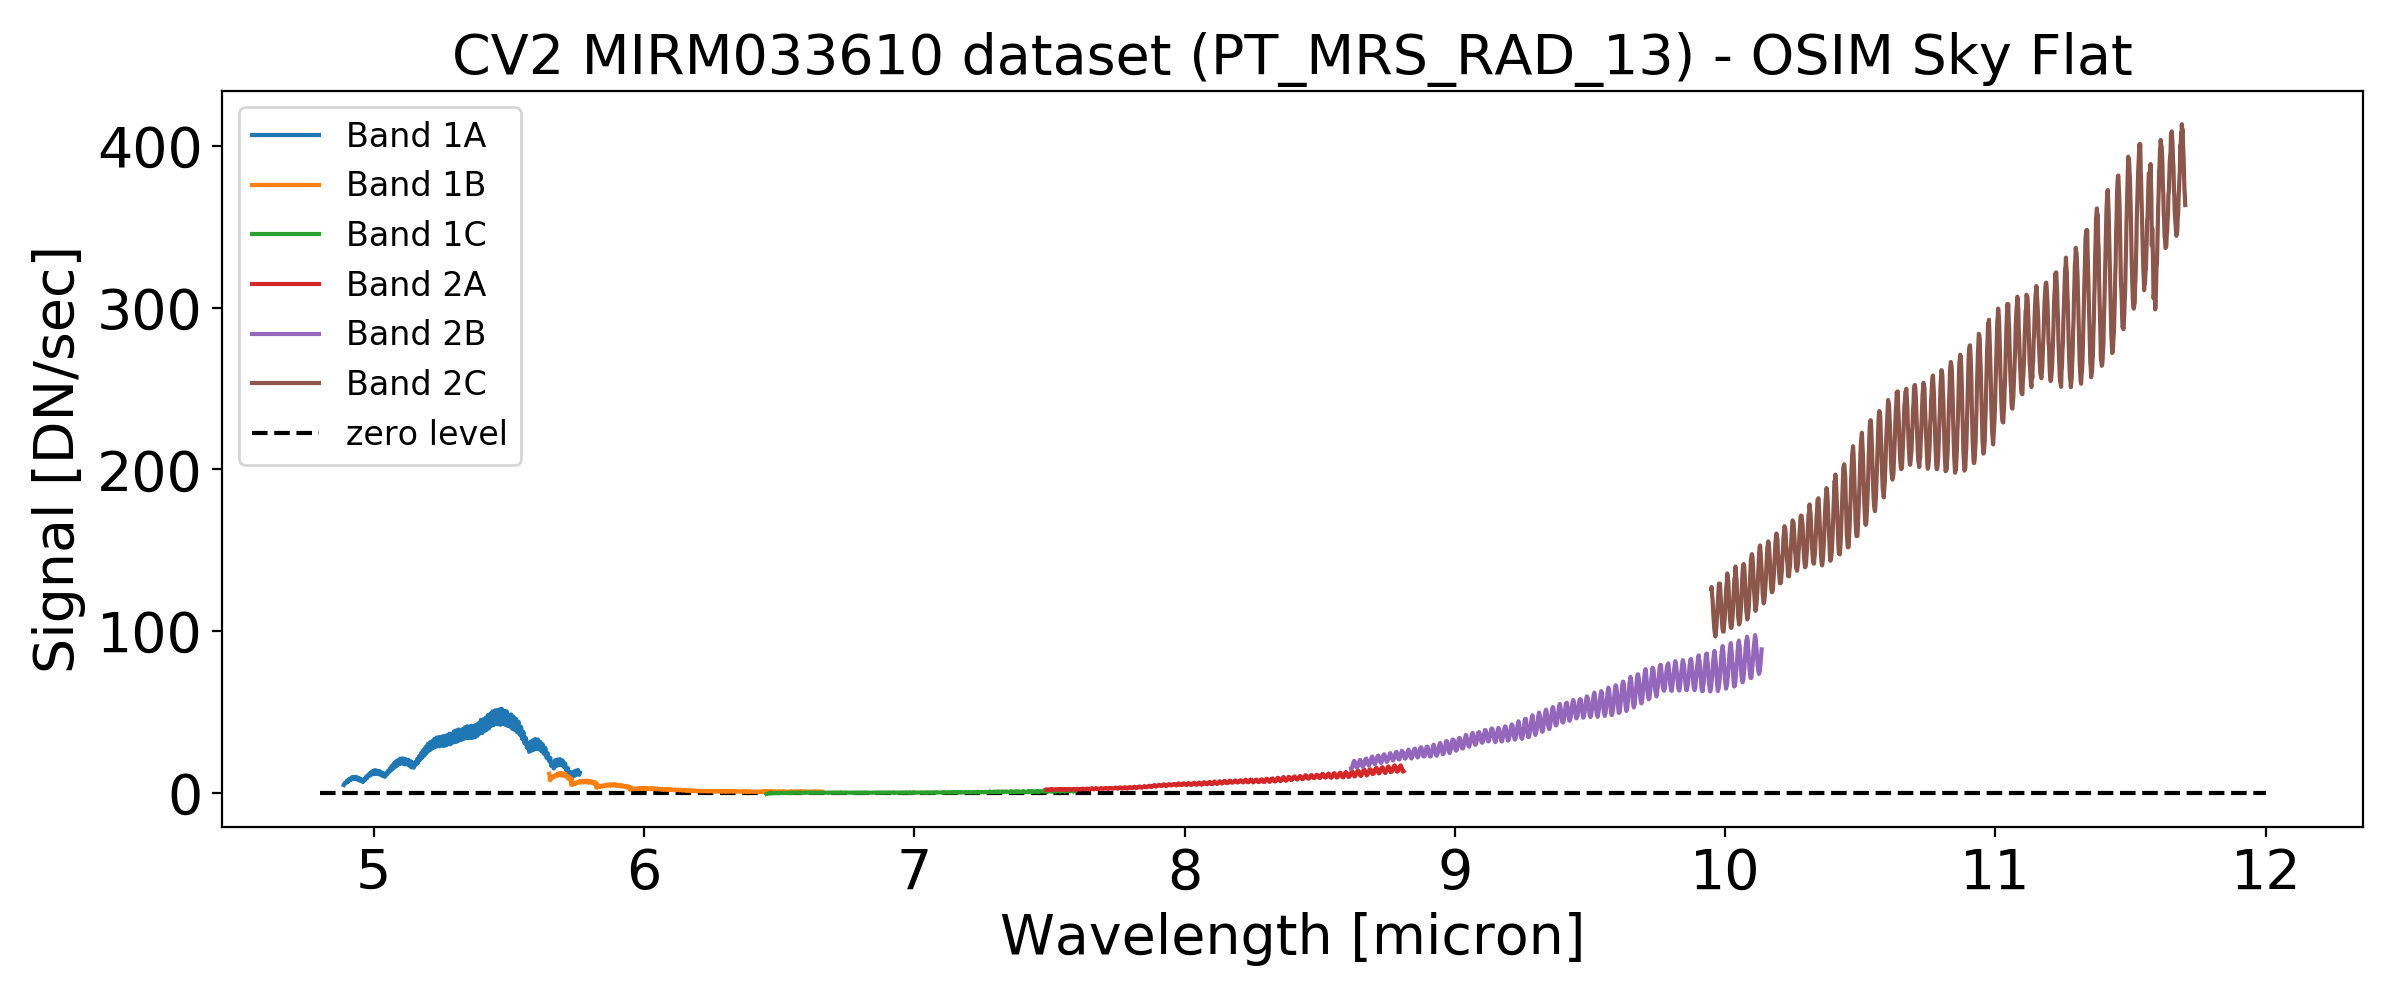

<IPython.core.display.Javascript object>


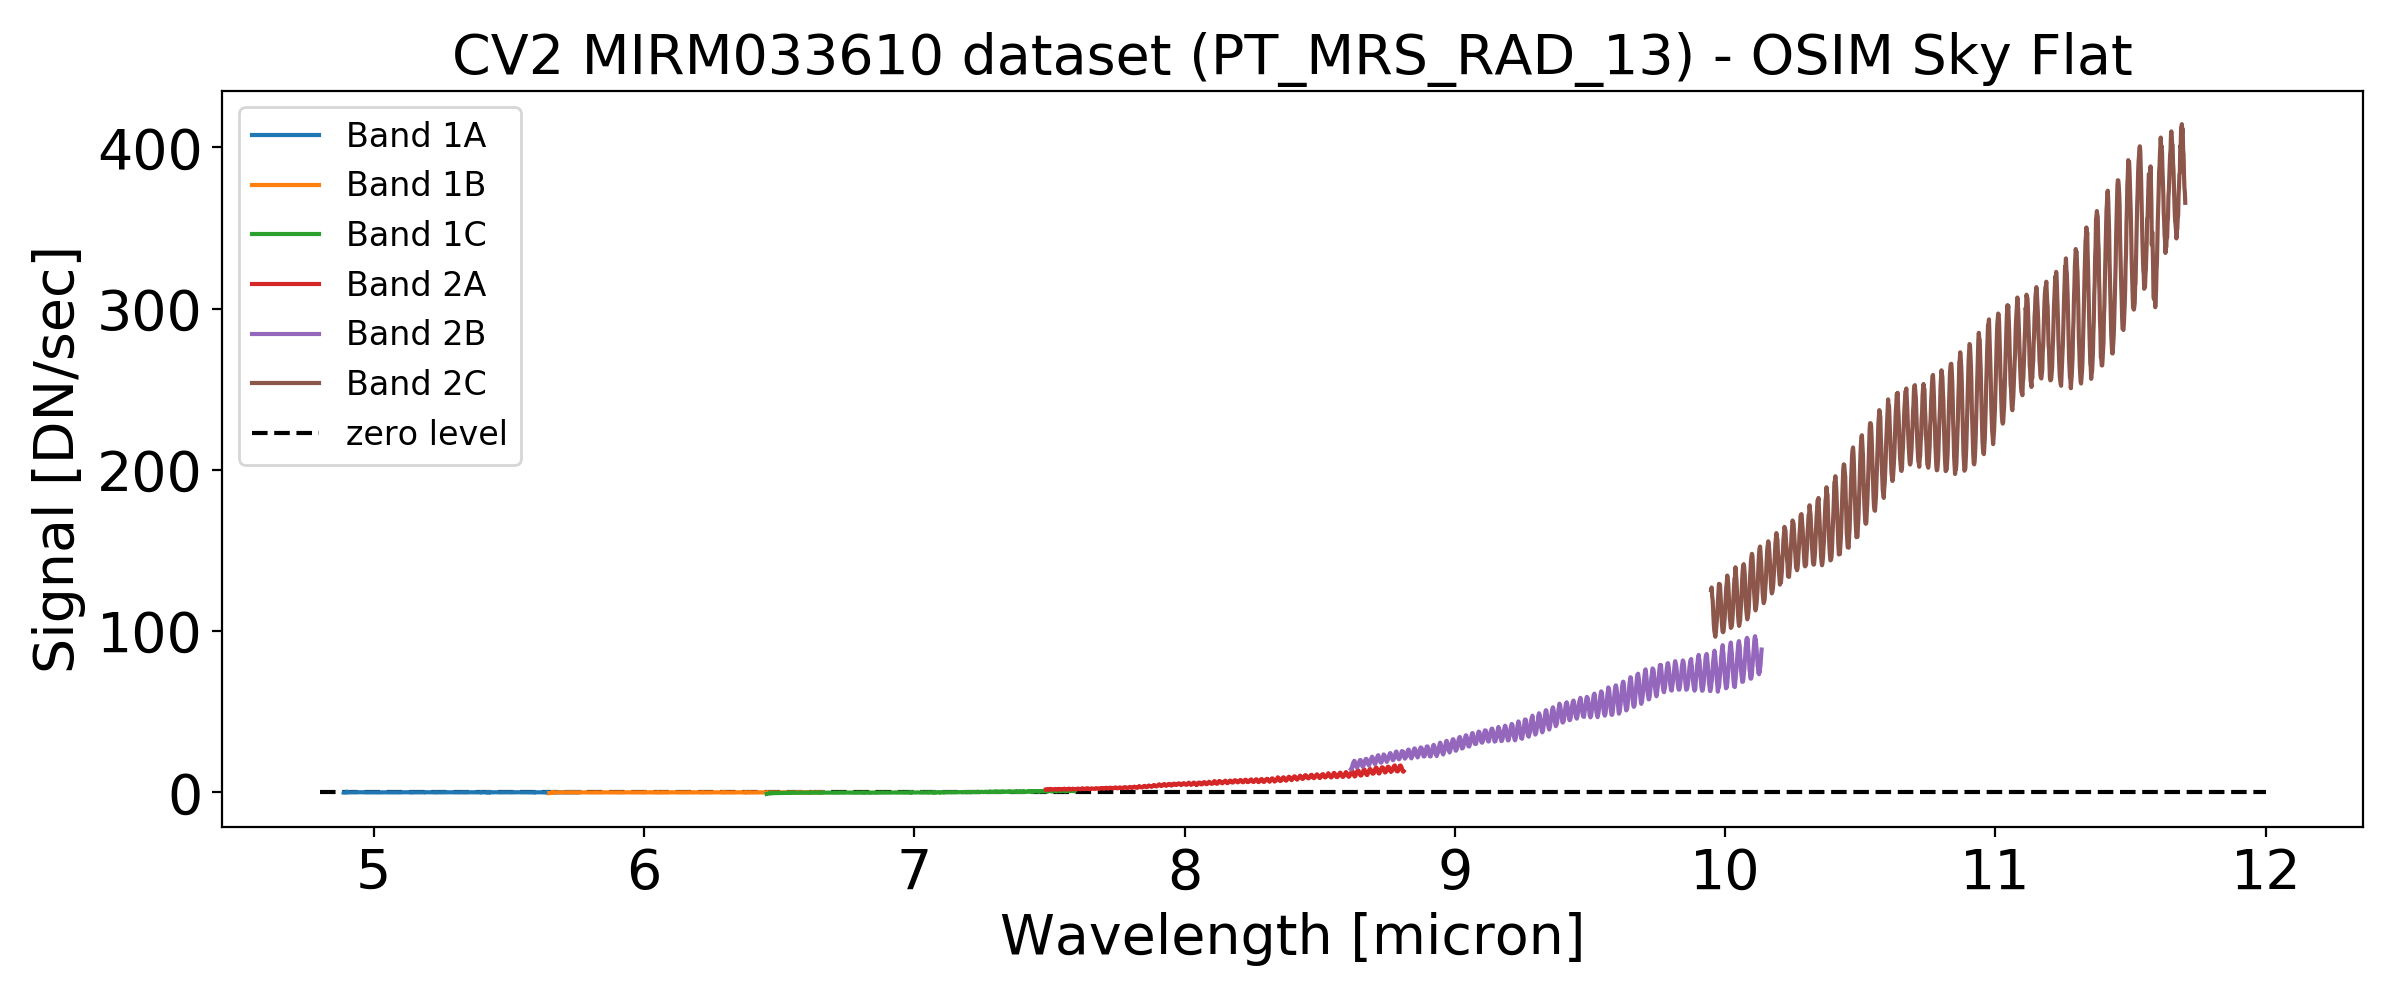

<IPython.core.display.Javascript object>


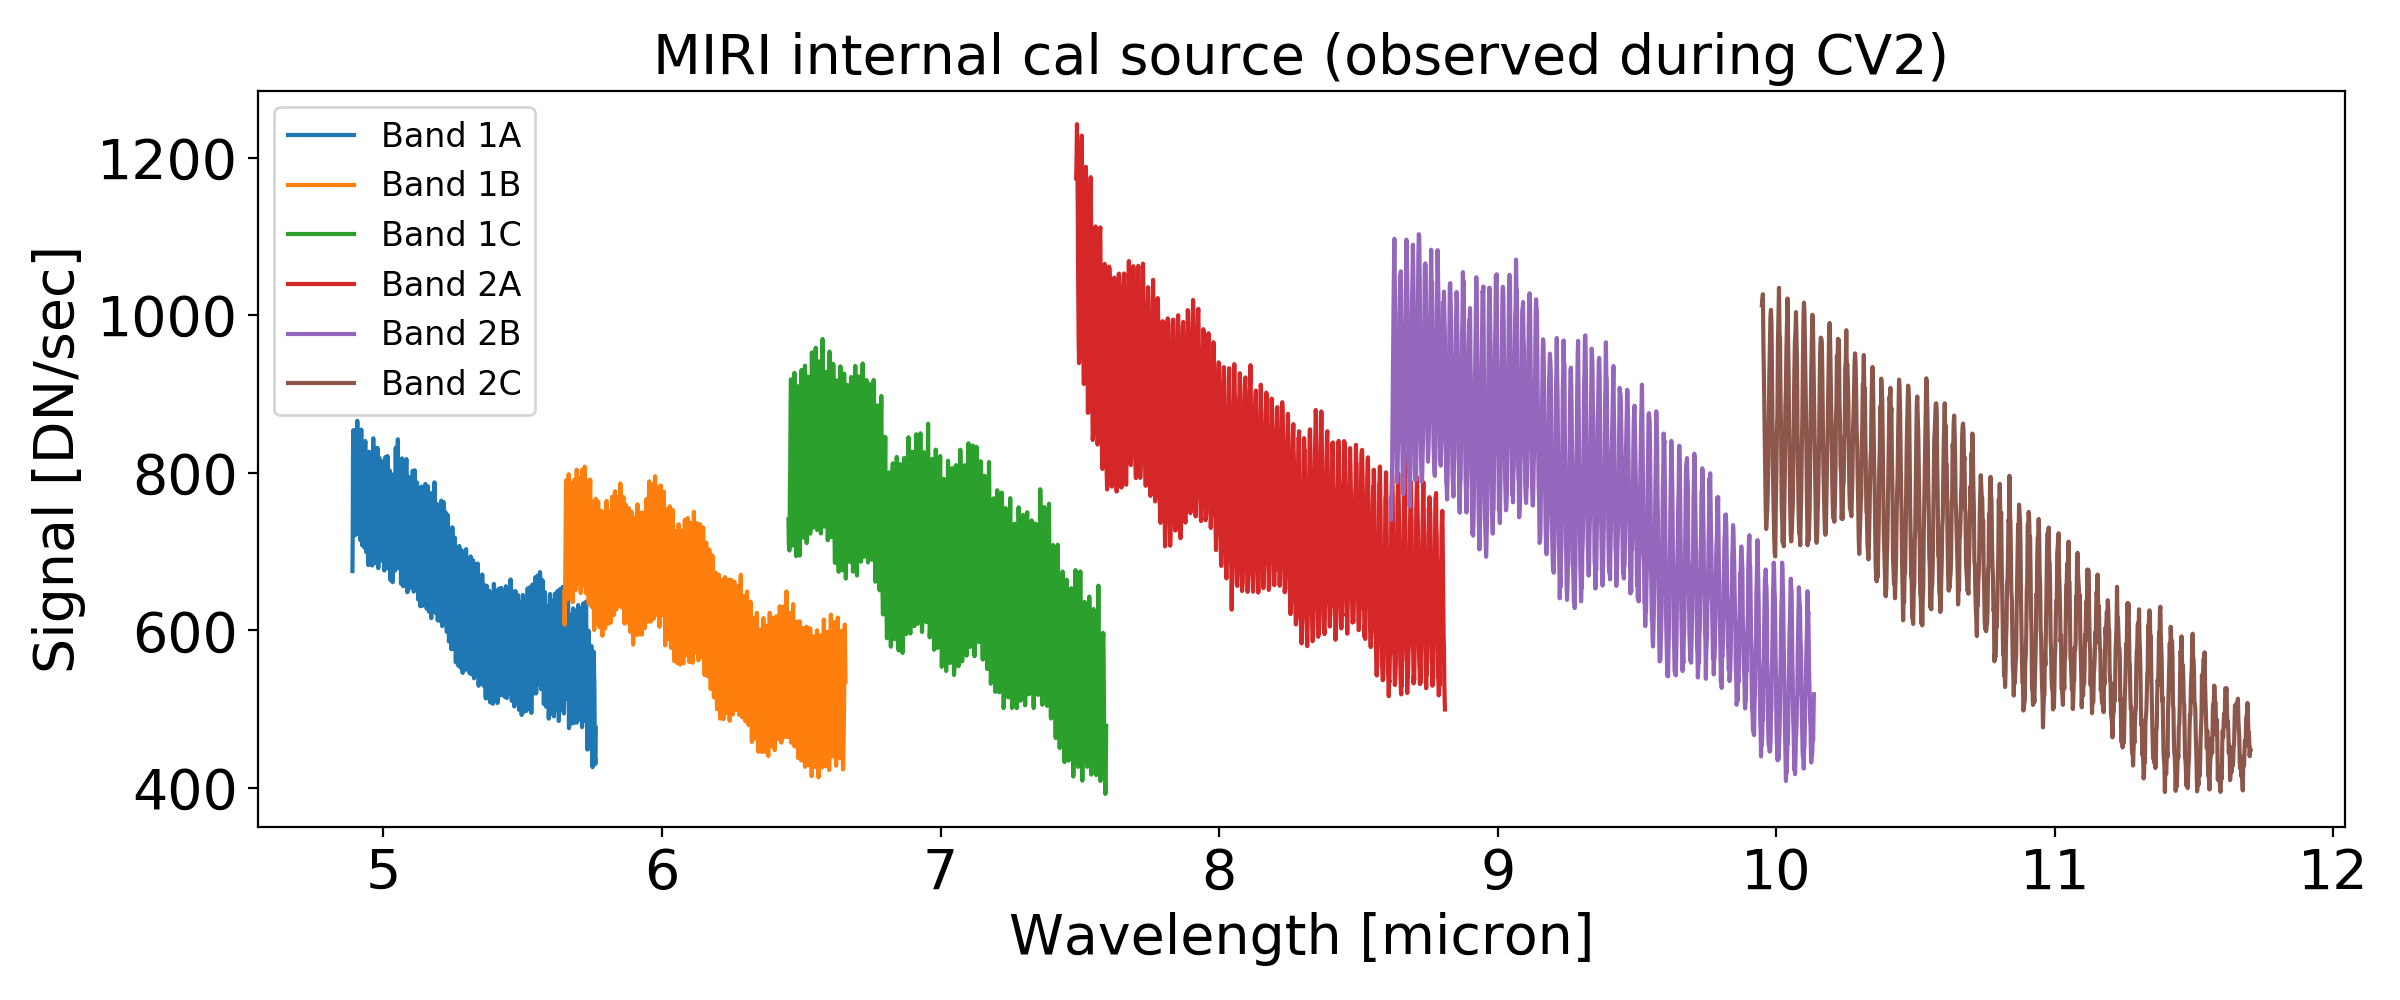

<IPython.core.display.Javascript object>


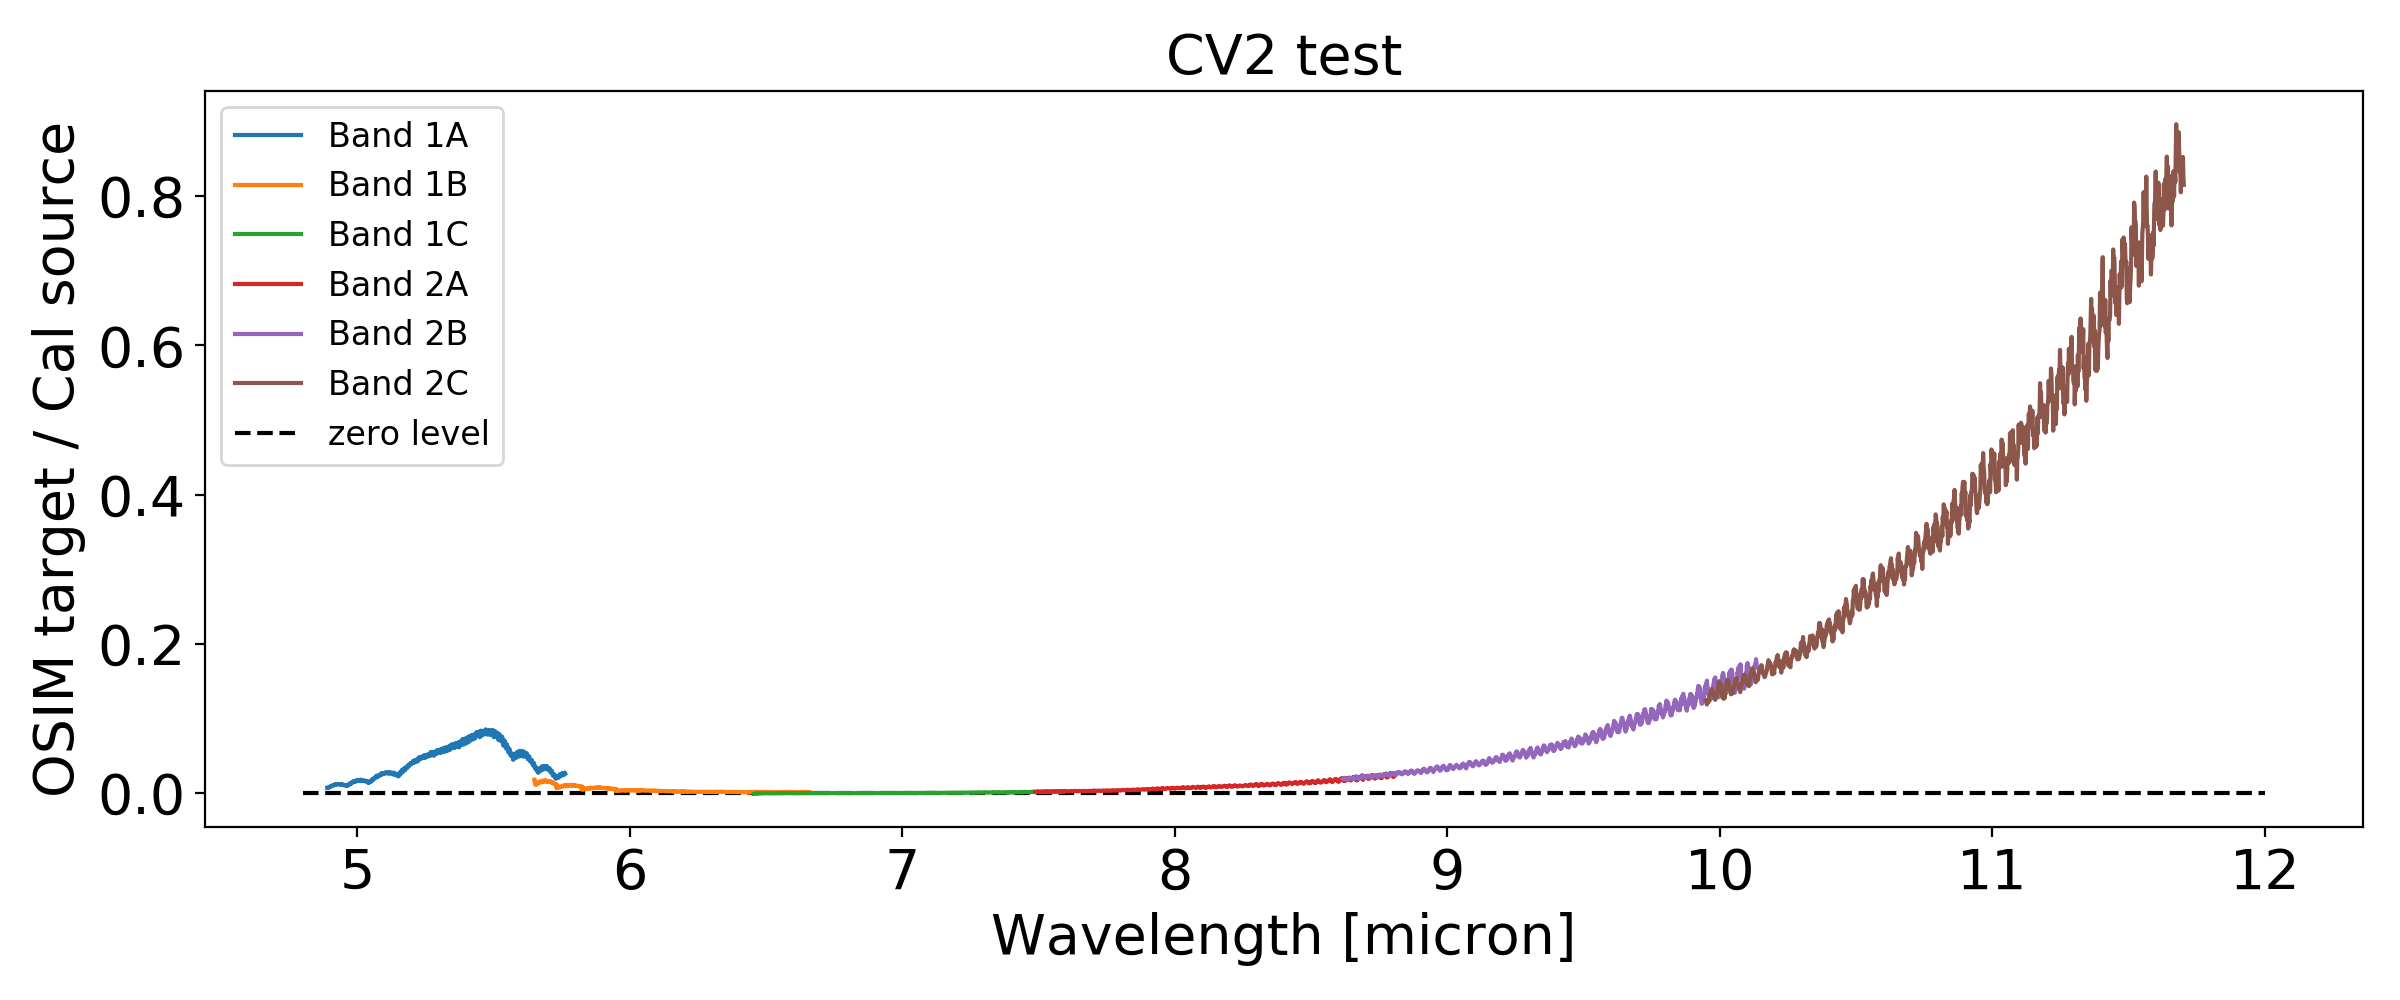

In [39]:
# plot pixel trace
plt.figure(figsize=(12,5))
plt.title('CV2 MIRM033610 dataset (PT_MRS_RAD_13) - OSIM Sky Flat')
for band in ['1A','1B']:
    plt.plot(lambdaMap[band][ypos,xpos[band]][5:-5],(img_SCI[band]-img_BKG[band])[ypos,xpos[band]][5:-5],label='Band {}'.format(band))
for band in ['1C','2A','2B','2C']:
    plt.plot(lambdaMap[band][ypos,xpos[band]][5:-5],img_SCI[band][ypos,xpos[band]][5:-5],label='Band {}'.format(band))
plt.hlines(0,4.8,12,linestyle='dashed',label='zero level')
plt.xlabel('Wavelength [micron]')
plt.ylabel('Signal [DN/sec]')
plt.legend(loc='upper left',fontsize=12)
plt.tight_layout()

plt.figure(figsize=(12,5))
plt.title('CV2 MIRM033610 dataset (PT_MRS_RAD_13) - OSIM Sky Flat')
for band in ['1A','1B','1C','2A','2B','2C']:
    plt.plot(lambdaMap[band][ypos,xpos[band]][5:-5],img_BKG[band][ypos,xpos[band]][5:-5],label='Band {}'.format(band))
plt.hlines(0,4.8,12,linestyle='dashed',label='zero level')
plt.xlabel('Wavelength [micron]')
plt.ylabel('Signal [DN/sec]')
plt.legend(loc='upper left',fontsize=12)
plt.tight_layout()

plt.figure(figsize=(12,5))
plt.title('MIRI internal cal source (observed during CV2)')
for band in ['1A','1B','1C','2A','2B','2C']:
    plt.plot(lambdaMap[band][ypos,xpos[band]][5:-5],CV2_intcal_source_sci[band][ypos,xpos[band]][5:-5],label='Band {}'.format(band))
plt.xlabel('Wavelength [micron]')
plt.ylabel('Signal [DN/sec]')
plt.legend(loc='upper left',fontsize=12)
plt.tight_layout()

plt.figure(figsize=(12,5))
plt.title('CV2 test')
for band in ['1A','1B']:
    plt.plot(lambdaMap[band][ypos,xpos[band]][5:-5],((img_SCI[band]-img_BKG[band])/CV2_intcal_source_sci[band])[ypos,xpos[band]][5:-5],label='Band {}'.format(band))
for band in ['1C','2A','2B','2C']:
    plt.plot(lambdaMap[band][ypos,xpos[band]][5:-5],(img_BKG[band]/CV2_intcal_source_sci[band])[ypos,xpos[band]][5:-5],label='Band {}'.format(band))
plt.hlines(0,4.8,12,linestyle='dashed',label='zero level')
plt.xlabel('Wavelength [micron]')
plt.ylabel('OSIM target / Cal source')
plt.legend(loc='upper left',fontsize=12)
plt.tight_layout()

<IPython.core.display.Javascript object>


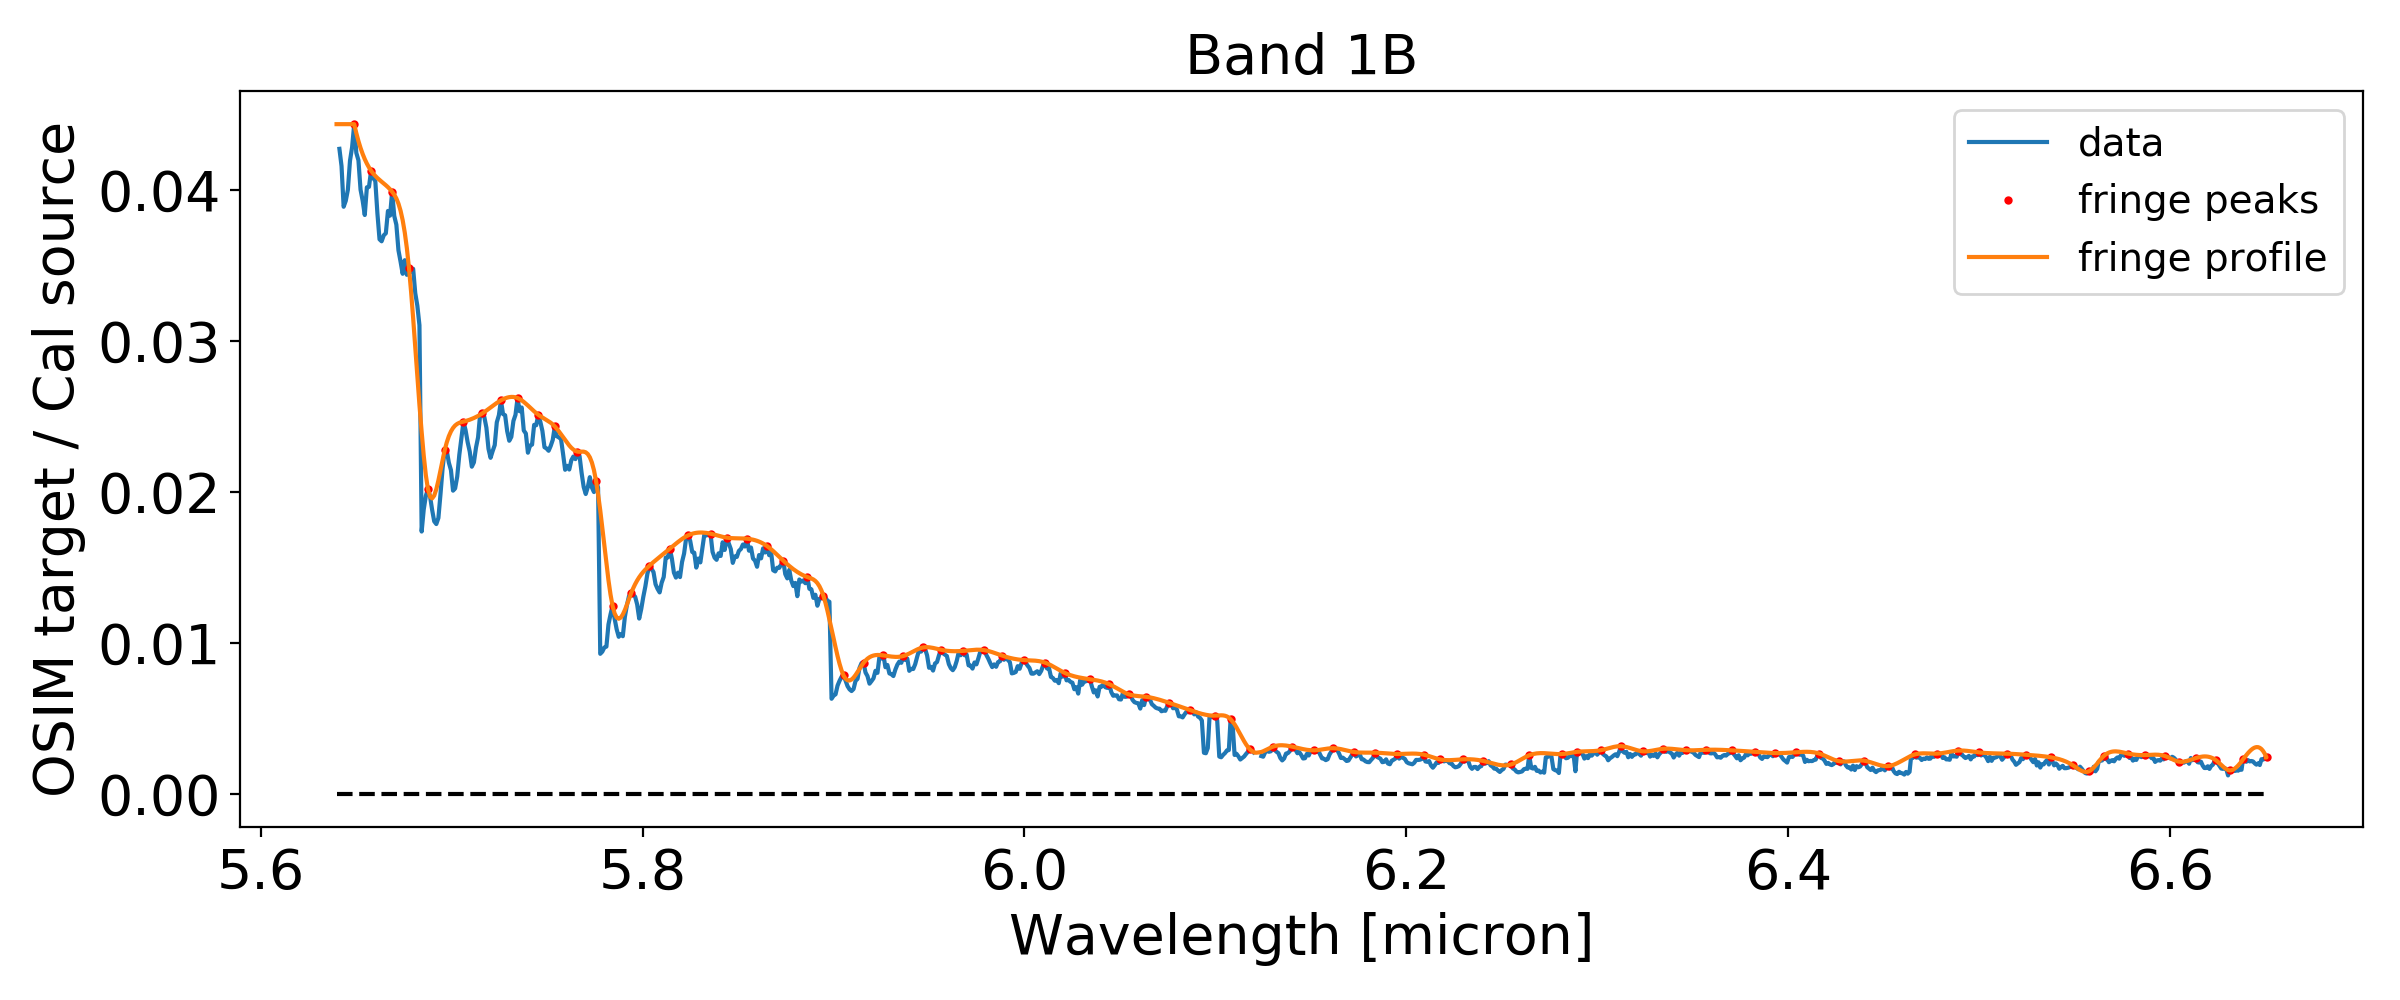

<IPython.core.display.Javascript object>


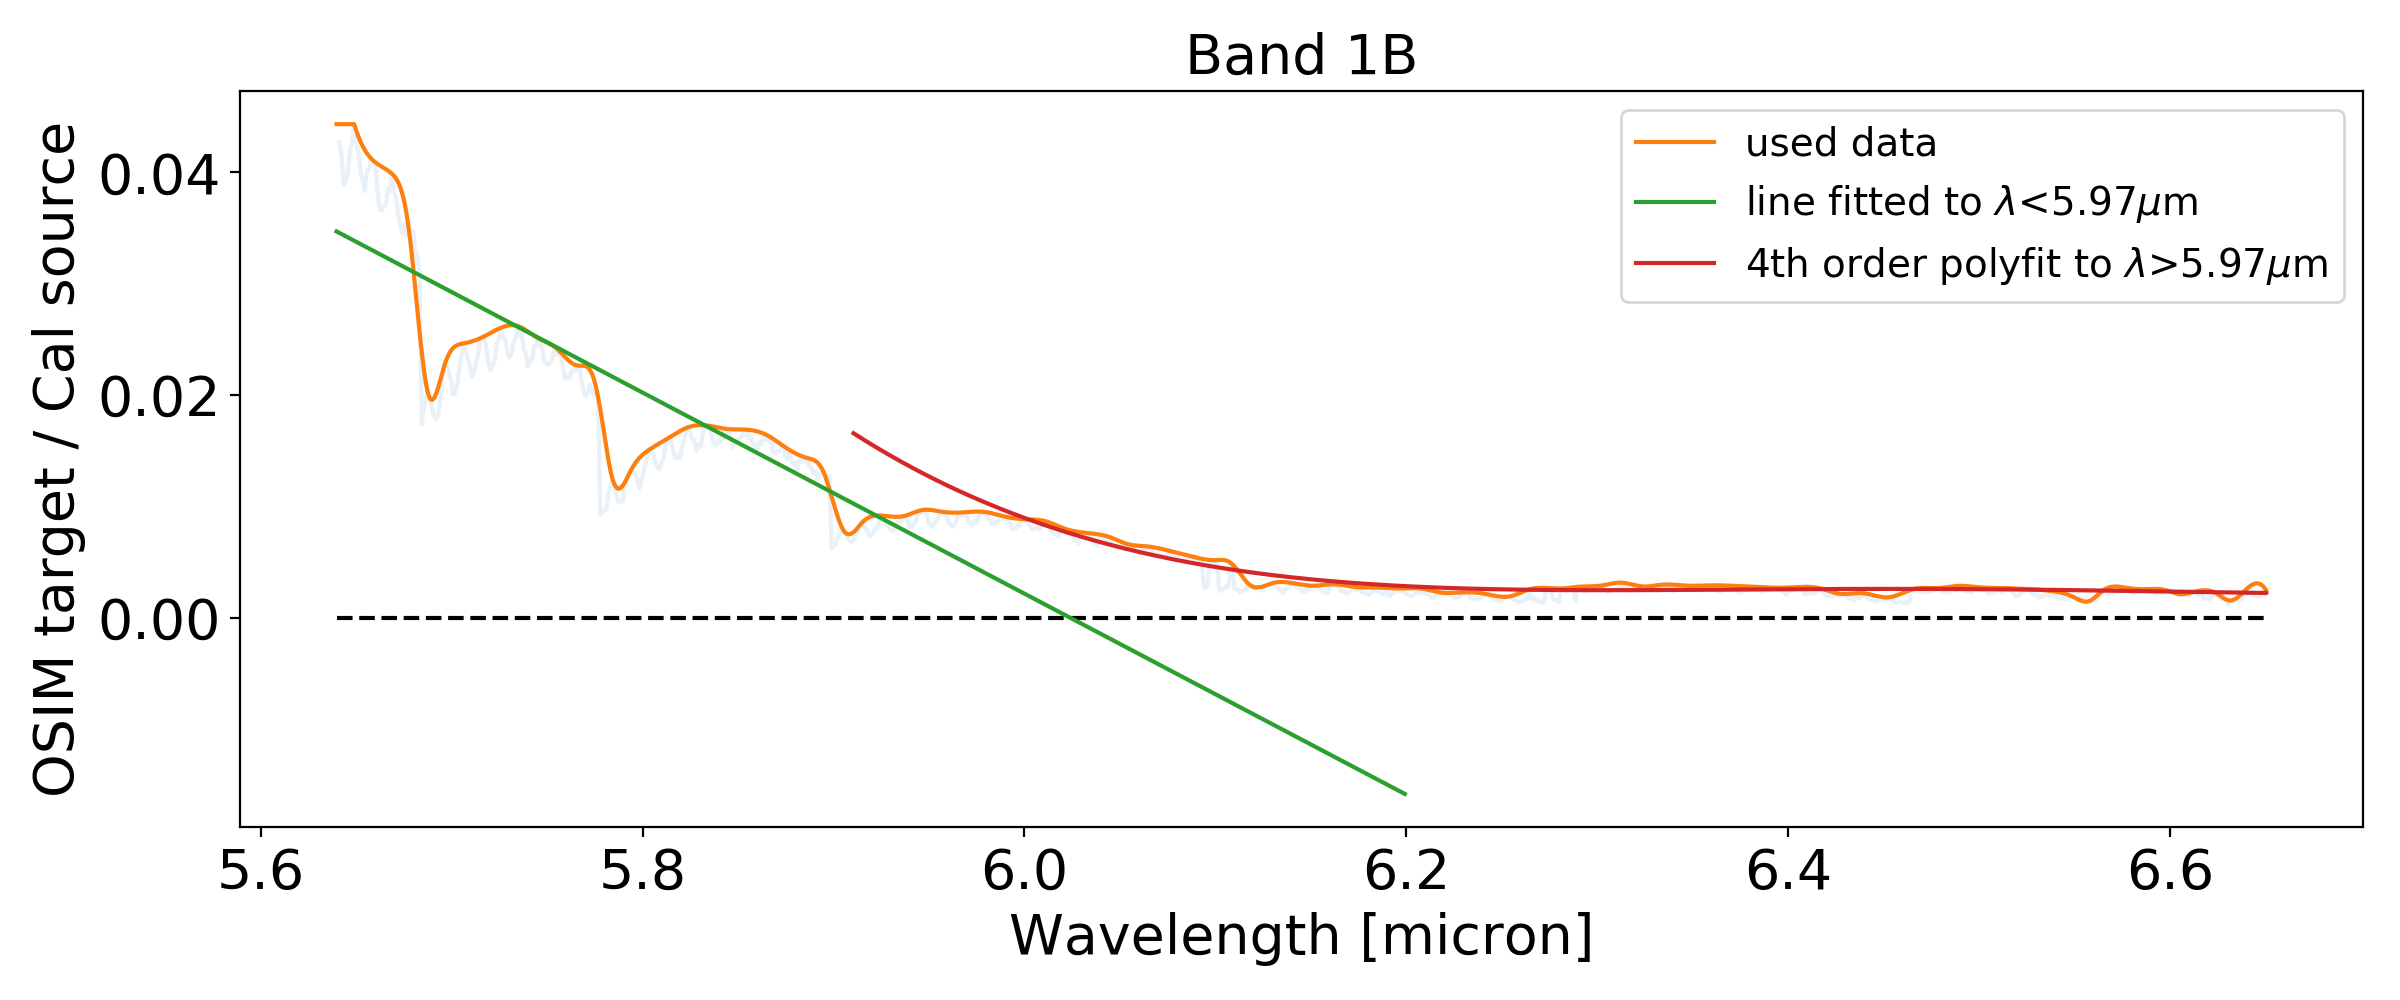

<IPython.core.display.Javascript object>


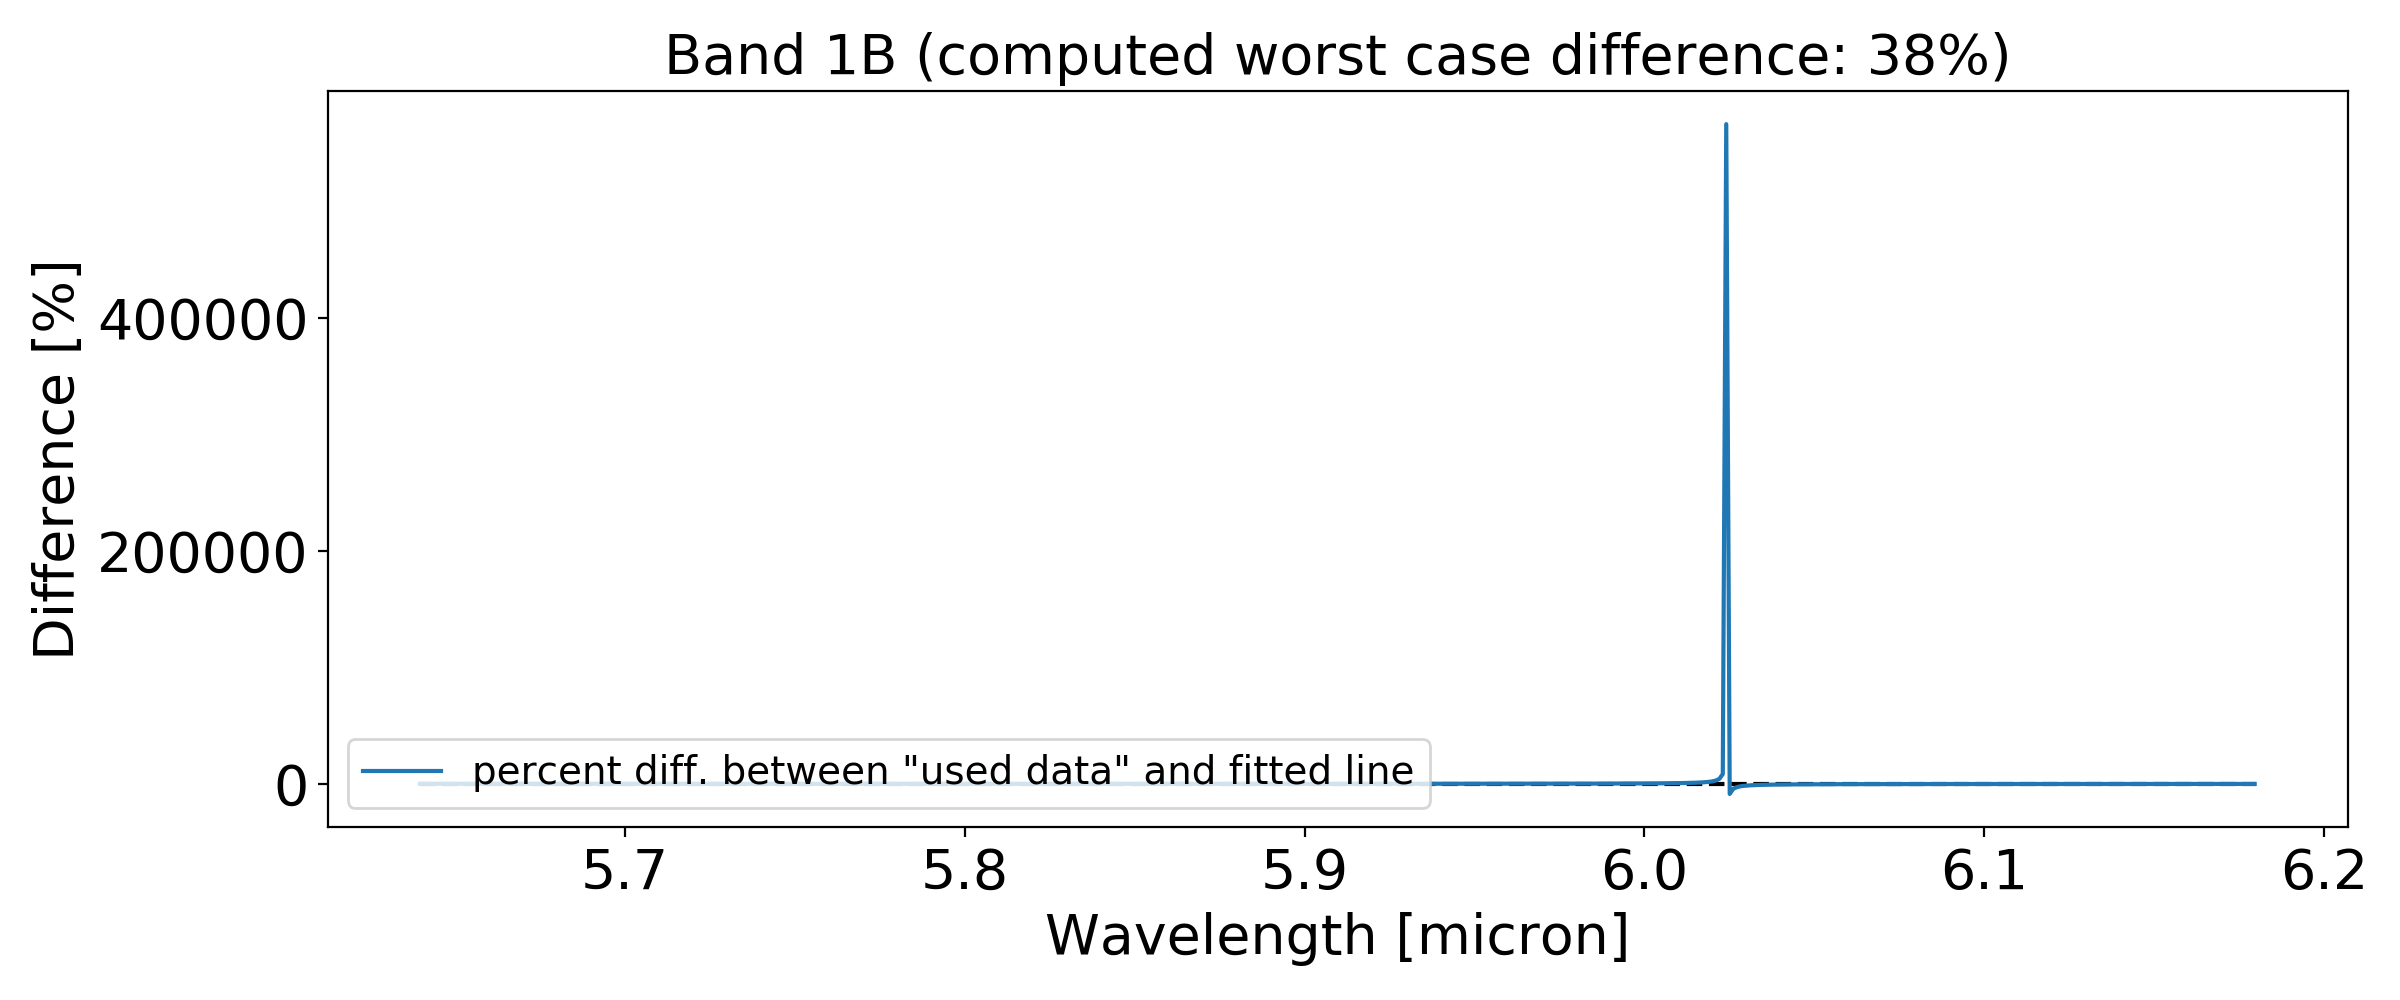

In [8]:
# Examine the OSIM sky flat data in band 1B (wavelength range 5.62-6.73 micron)
band = '1B'
lambdas = lambdaMap[band][ypos,xpos[band]]
data = ((img_SCI_1B-img_BKG_1B)/CV2_intcal_source_sci[band])[ypos,xpos[band]]
data_noNaN,peaks,data_profile = funcs.norm_fringe(data,thres=0,min_dist=7,k=3,ext=3)

# plot starter analysis
plt.figure(figsize=(12,5))
plt.title('Band {}'.format(band))
plt.plot(lambdas,data,label='data')
plt.plot(lambdas[peaks],data_noNaN[peaks],'ro',markersize=2,label='fringe peaks')
plt.plot(lambdas,data_profile,label='fringe profile')
plt.hlines(0,lambdas.min(),lambdas.max(),linestyle='dashed')
plt.xlabel('Wavelength [micron]')
plt.ylabel('OSIM target / Cal source')
plt.legend(loc='upper right')
plt.tight_layout()

# Investigate regions of interest
sel = (lambdas <5.97)
popt1     = np.polyfit(lambdas[sel],data_profile[sel],1)
poly1     = np.poly1d(popt1)

sel = (lambdas > 5.972)
popt2     = np.polyfit(lambdas[sel],data_profile[sel],4)
poly2     = np.poly1d(popt2)

# plot resulting fits and residuals
plt.figure(figsize=(12,5))
plt.title('Band {}'.format(band))
plt.plot(lambdas,data,alpha=0.1)
plt.plot(lambdas,data_profile,label='used data')
plt.plot(lambdas[lambdas<6.2],poly1(lambdas[lambdas<6.2]),label=r'line fitted to $\lambda$<5.97$\mu$m')
plt.plot(lambdas[(lambdas > 5.91)],poly2(lambdas[(lambdas > 5.91)]),label=r'4th order polyfit to $\lambda$>5.97$\mu$m')
plt.hlines(0,lambdas.min(),lambdas.max(),linestyle='dashed')
plt.xlabel('Wavelength [micron]')
plt.ylabel('OSIM target / Cal source')
plt.legend(loc='upper right')
plt.tight_layout()

plt.figure(figsize=(12,5))
plt.title('Band {} (computed worst case difference: 38%)'.format(band))
plt.plot(lambdas[lambdas<6.18],((data_profile-poly1(lambdas))/poly1(lambdas))[lambdas<6.18]*100.,label='percent diff. between "used data" and fitted line')
plt.hlines(0,lambdas.min(),6.18,linestyle='dashed')
plt.xlabel('Wavelength [micron]')
plt.ylabel(r'Difference [%]')
plt.legend(loc='lower left')
plt.tight_layout()

STEP 1: Rough centroiding
Slice 11 has the largest summed flux
Source position: beta = 0.0arcsec, alpha = -0.29arcsec 

STEP 2: 1D Gaussian fit
[Along-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582]
[Across-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582]

STEP 3: 2D Gaussian fit
The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 37, 38, 39, 41, 117, 118, 119, 191, 197, 287, 288, 295, 296, 297, 298, 336, 337, 338, 361, 362, 363, 364, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582]


<IPython.core.display.Javascript object>


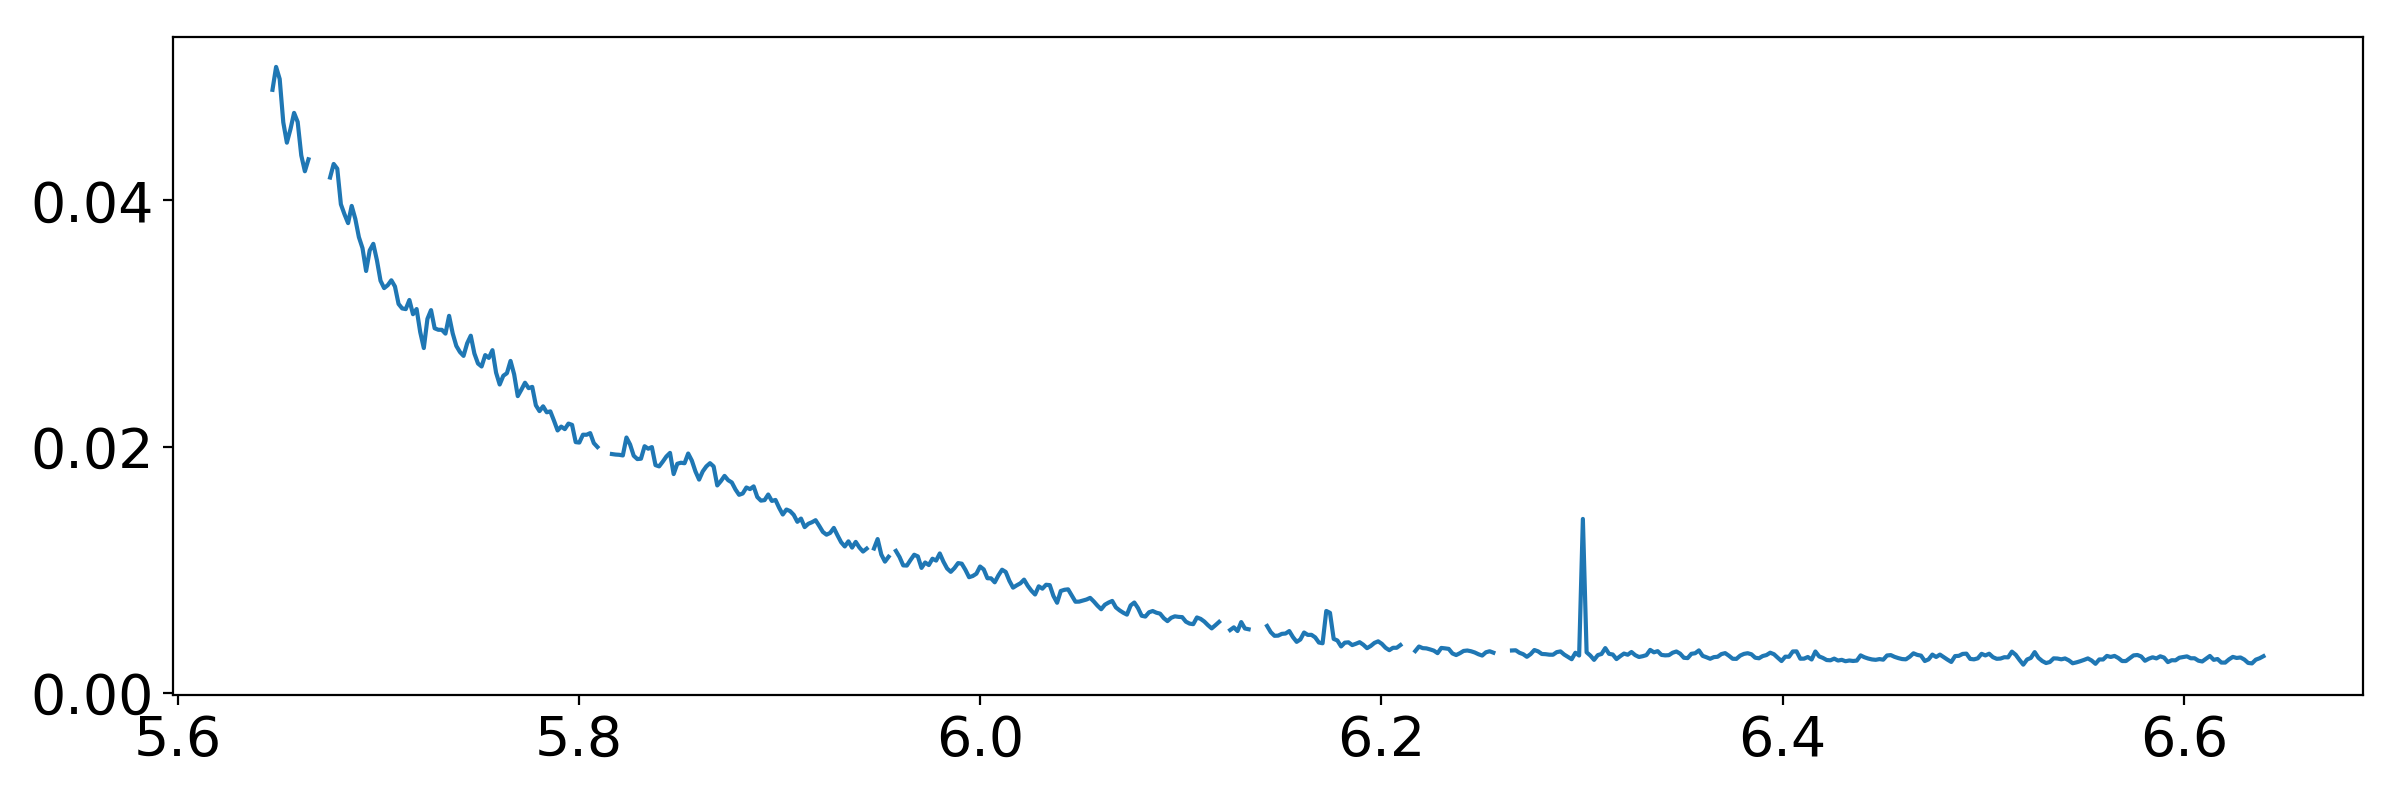

In [14]:
#
data = (img_SCI_1B-img_BKG_1B)/CV2_intcal_source_sci[band]
d2cMaps = funcs.load_obj('d2cMaps_band{}'.format(band),path=d2cMapDir)
specres_table = funcs.get_cdps(band,cdpDir)[4]
lambcens,lambfwhms = funcs.spectral_gridding(band,d2cMaps,specres_table=specres_table)
sign_amp2D,alpha_centers2D,beta_centers2D,sigma_alpha2D,sigma_beta2D,bkg_amp2D = funcs.point_source_centroiding(band,data,d2cMaps,spec_grid=[lambcens,lambfwhms],fit='2D')

plt.figure(figsize=(12,4))
plt.plot(lambcens,sign_amp2D)
plt.tight_layout()

<IPython.core.display.Javascript object>


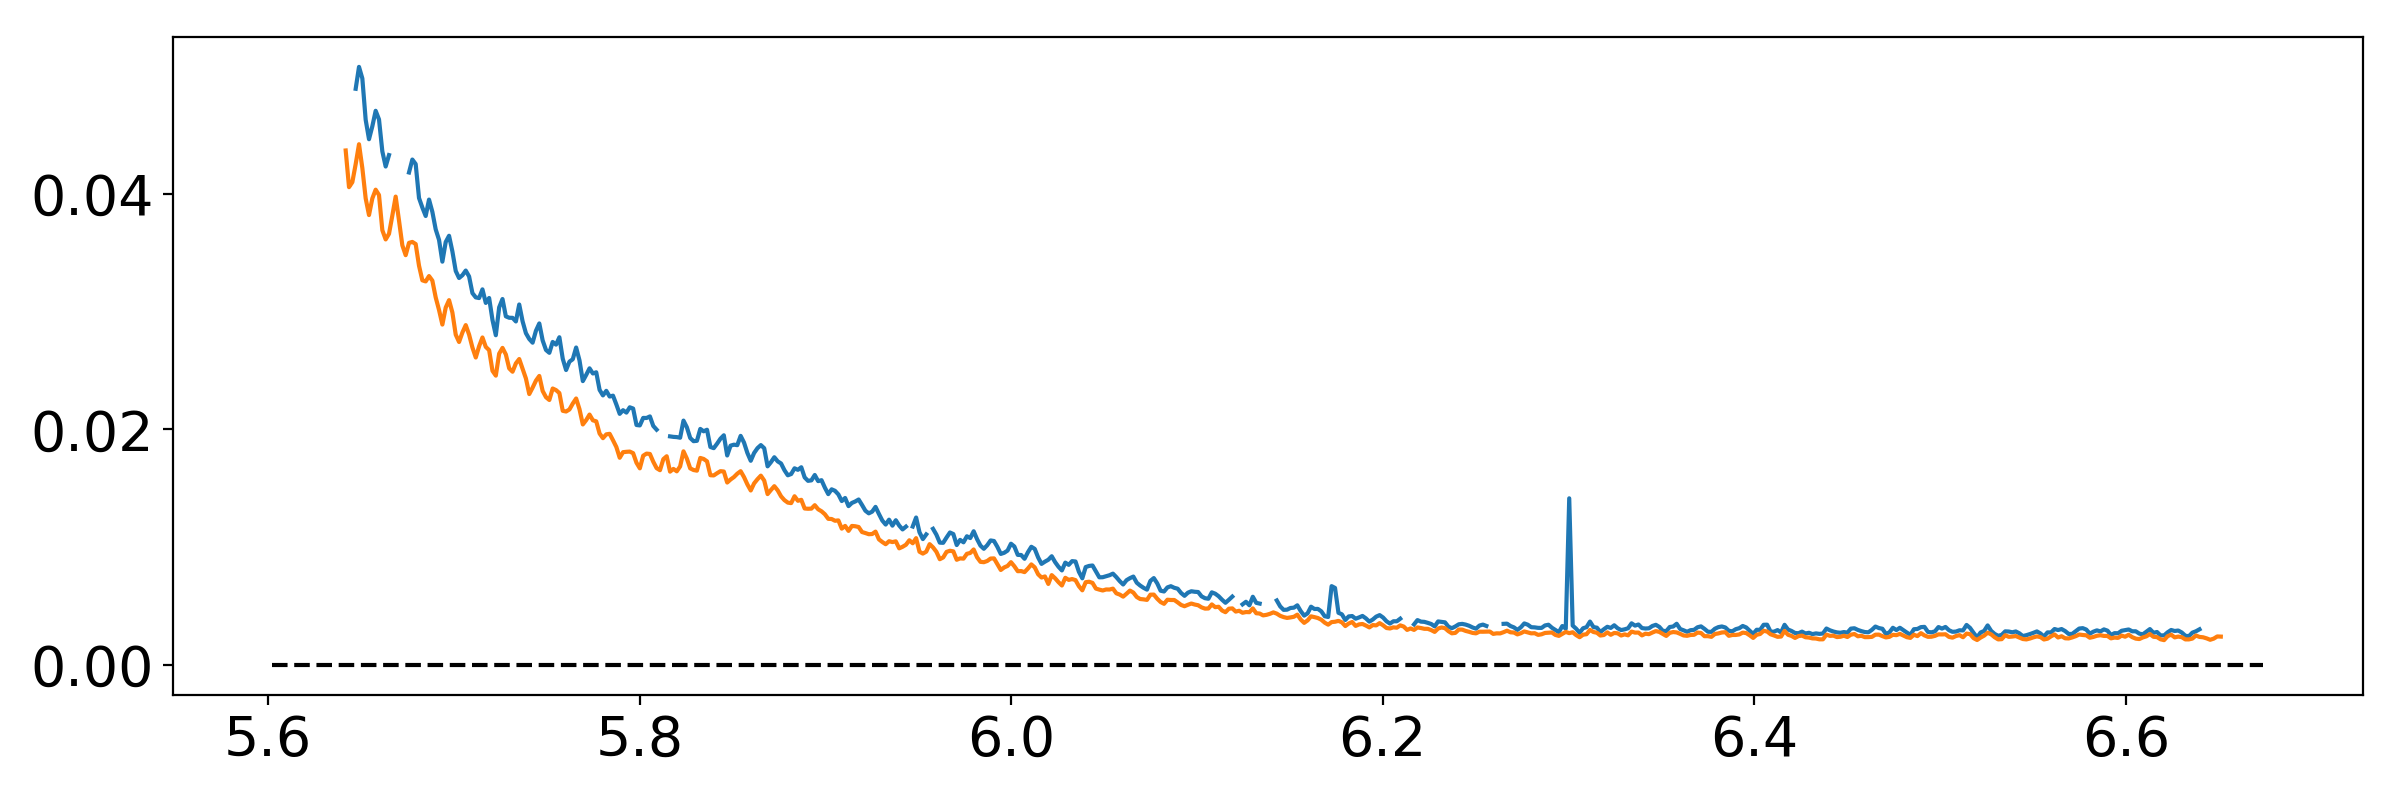

In [17]:
# #
# data = (img_SCI_1B-img_BKG_1B)/CV2_intcal_source_sci[band]
# d2cMaps = funcs.load_obj('d2cMaps_band{}'.format(band),path=d2cMapDir)
# specres_table = funcs.get_cdps(band,cdpDir)[4]
# lambcens,lambfwhms = funcs.spectral_gridding(band,d2cMaps,specres_table=specres_table)
# sign_amps,alpha_centers,source_center_slice,alpha_sigmas,bkg_amps = funcs.point_source_along_slice_centroiding(band,data,d2cMaps,spec_grid=[lambcens,lambfwhms])

plt.figure(figsize=(12,4))
plt.plot(lambcens,sign_amp2D)
plt.plot(lambcens,sign_amps)
plt.hlines(0,lambcens.min(),lambcens.max(),linestyle='dashed')
plt.tight_layout()

<IPython.core.display.Javascript object>


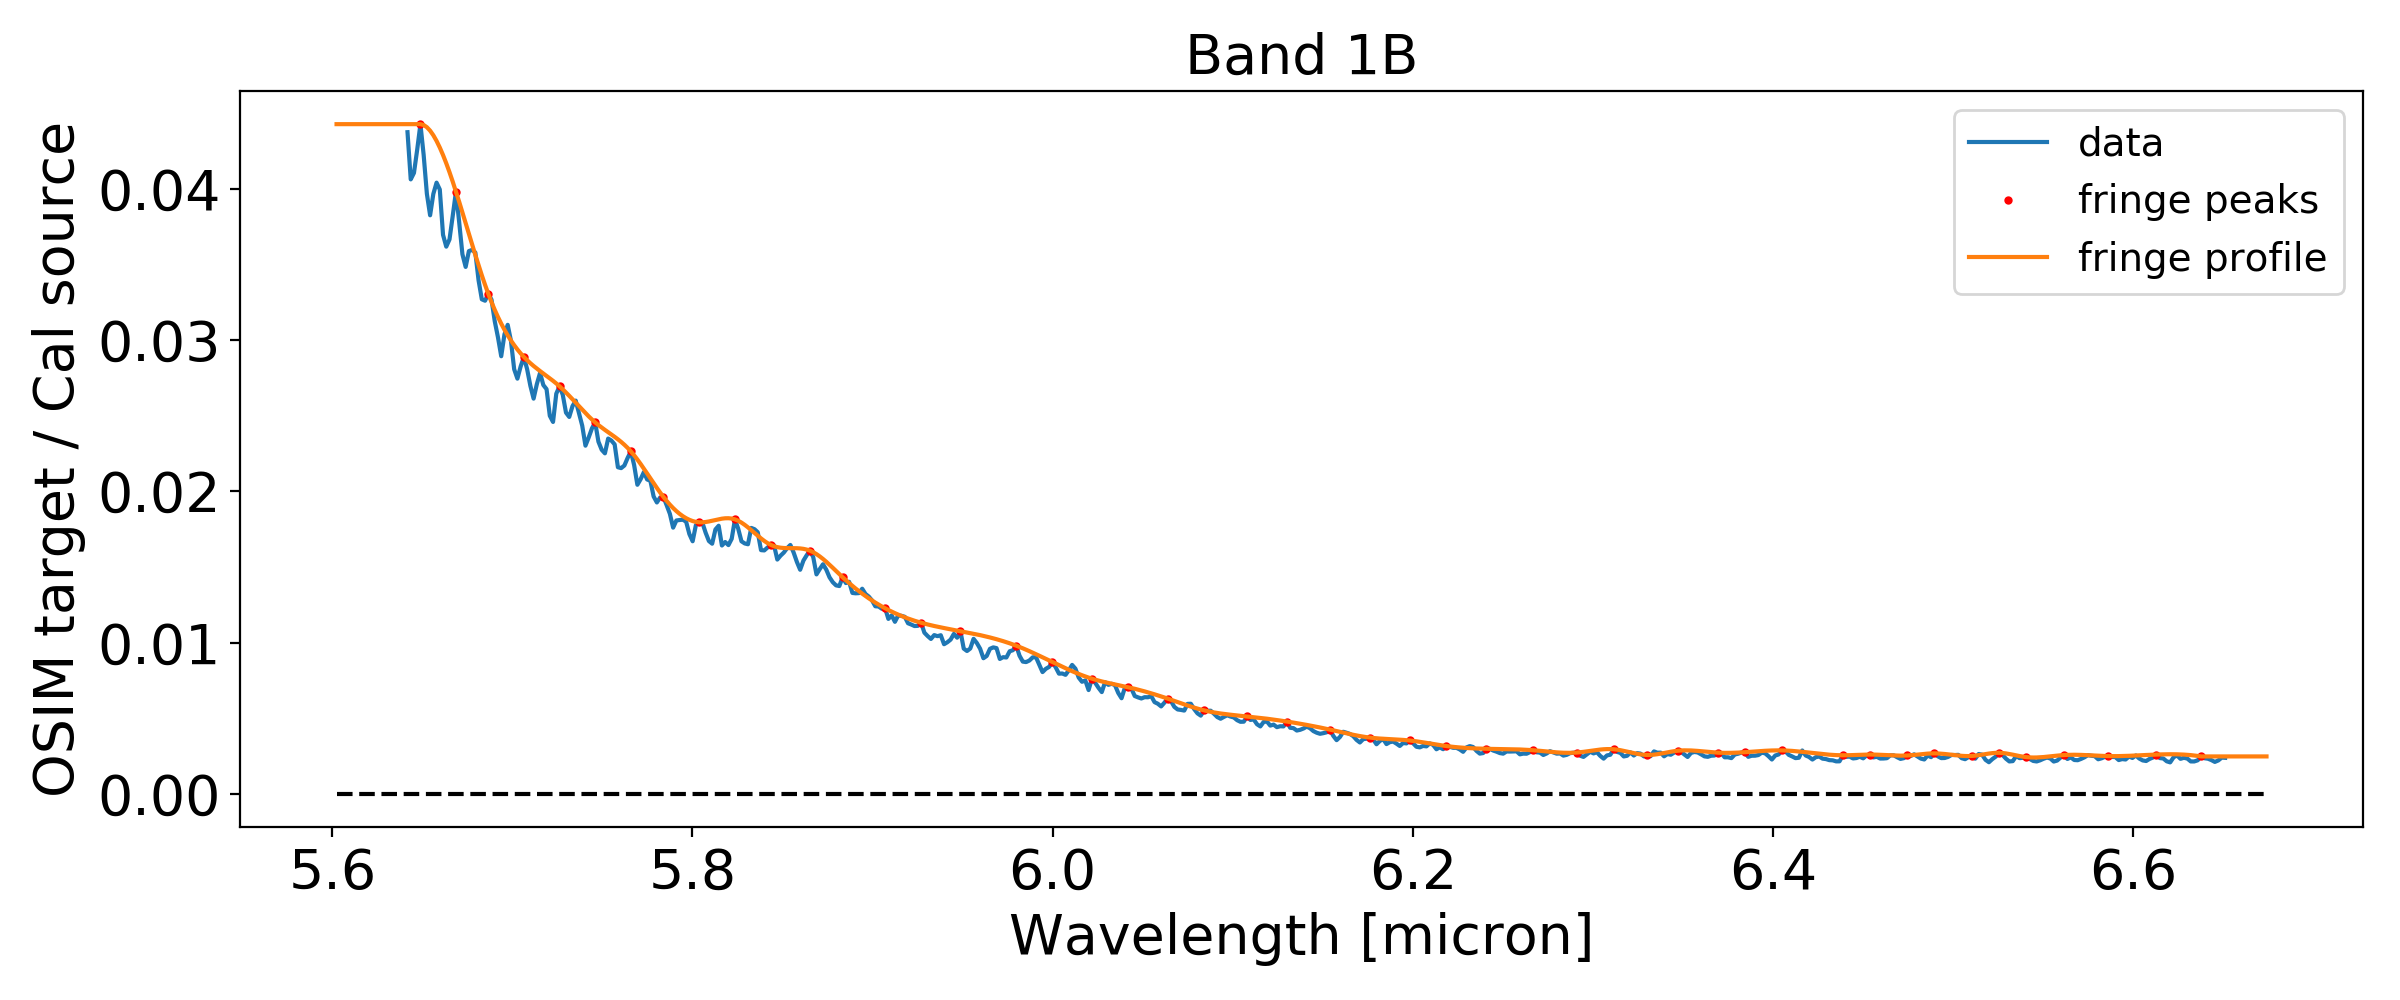

<IPython.core.display.Javascript object>


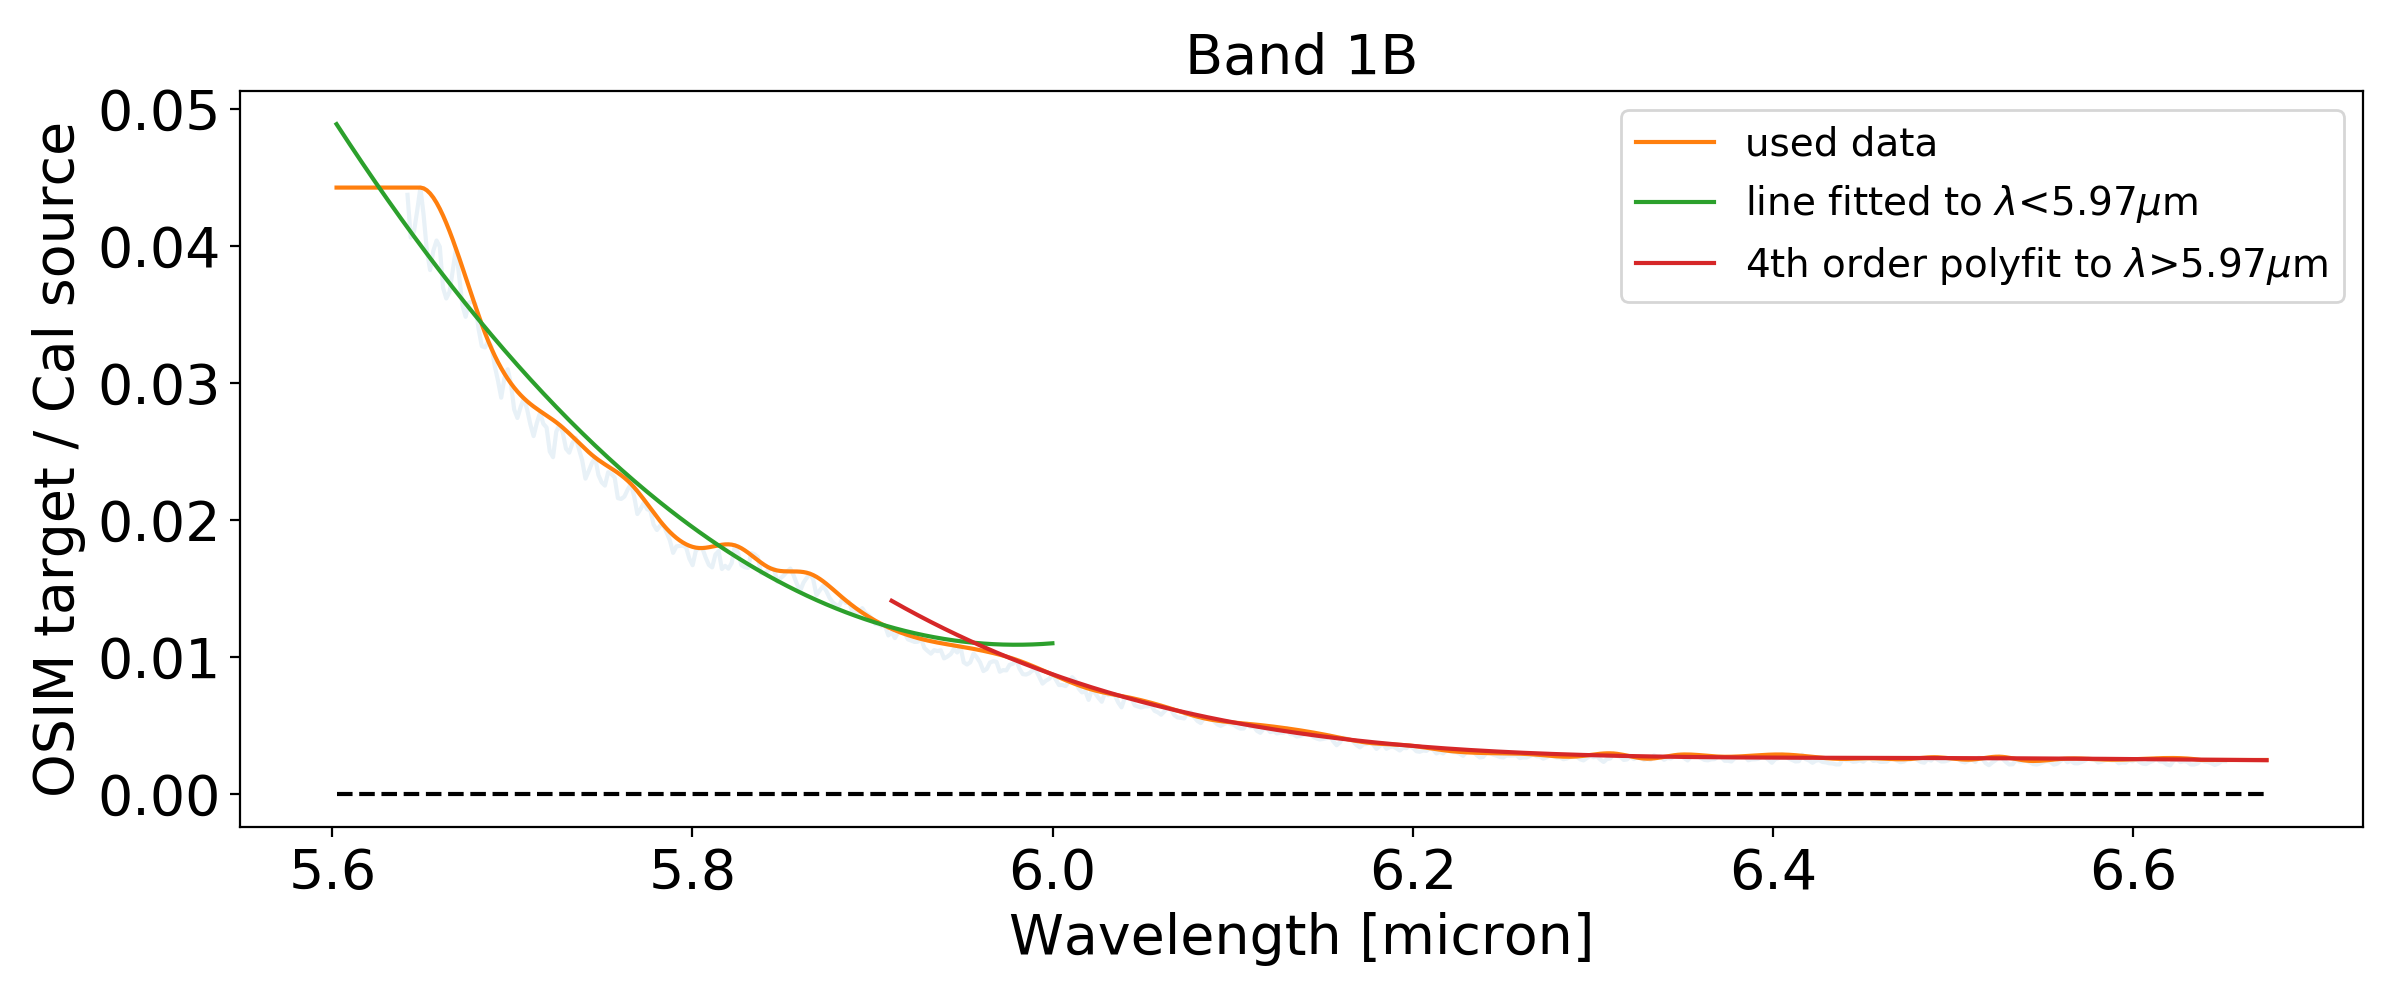

<IPython.core.display.Javascript object>


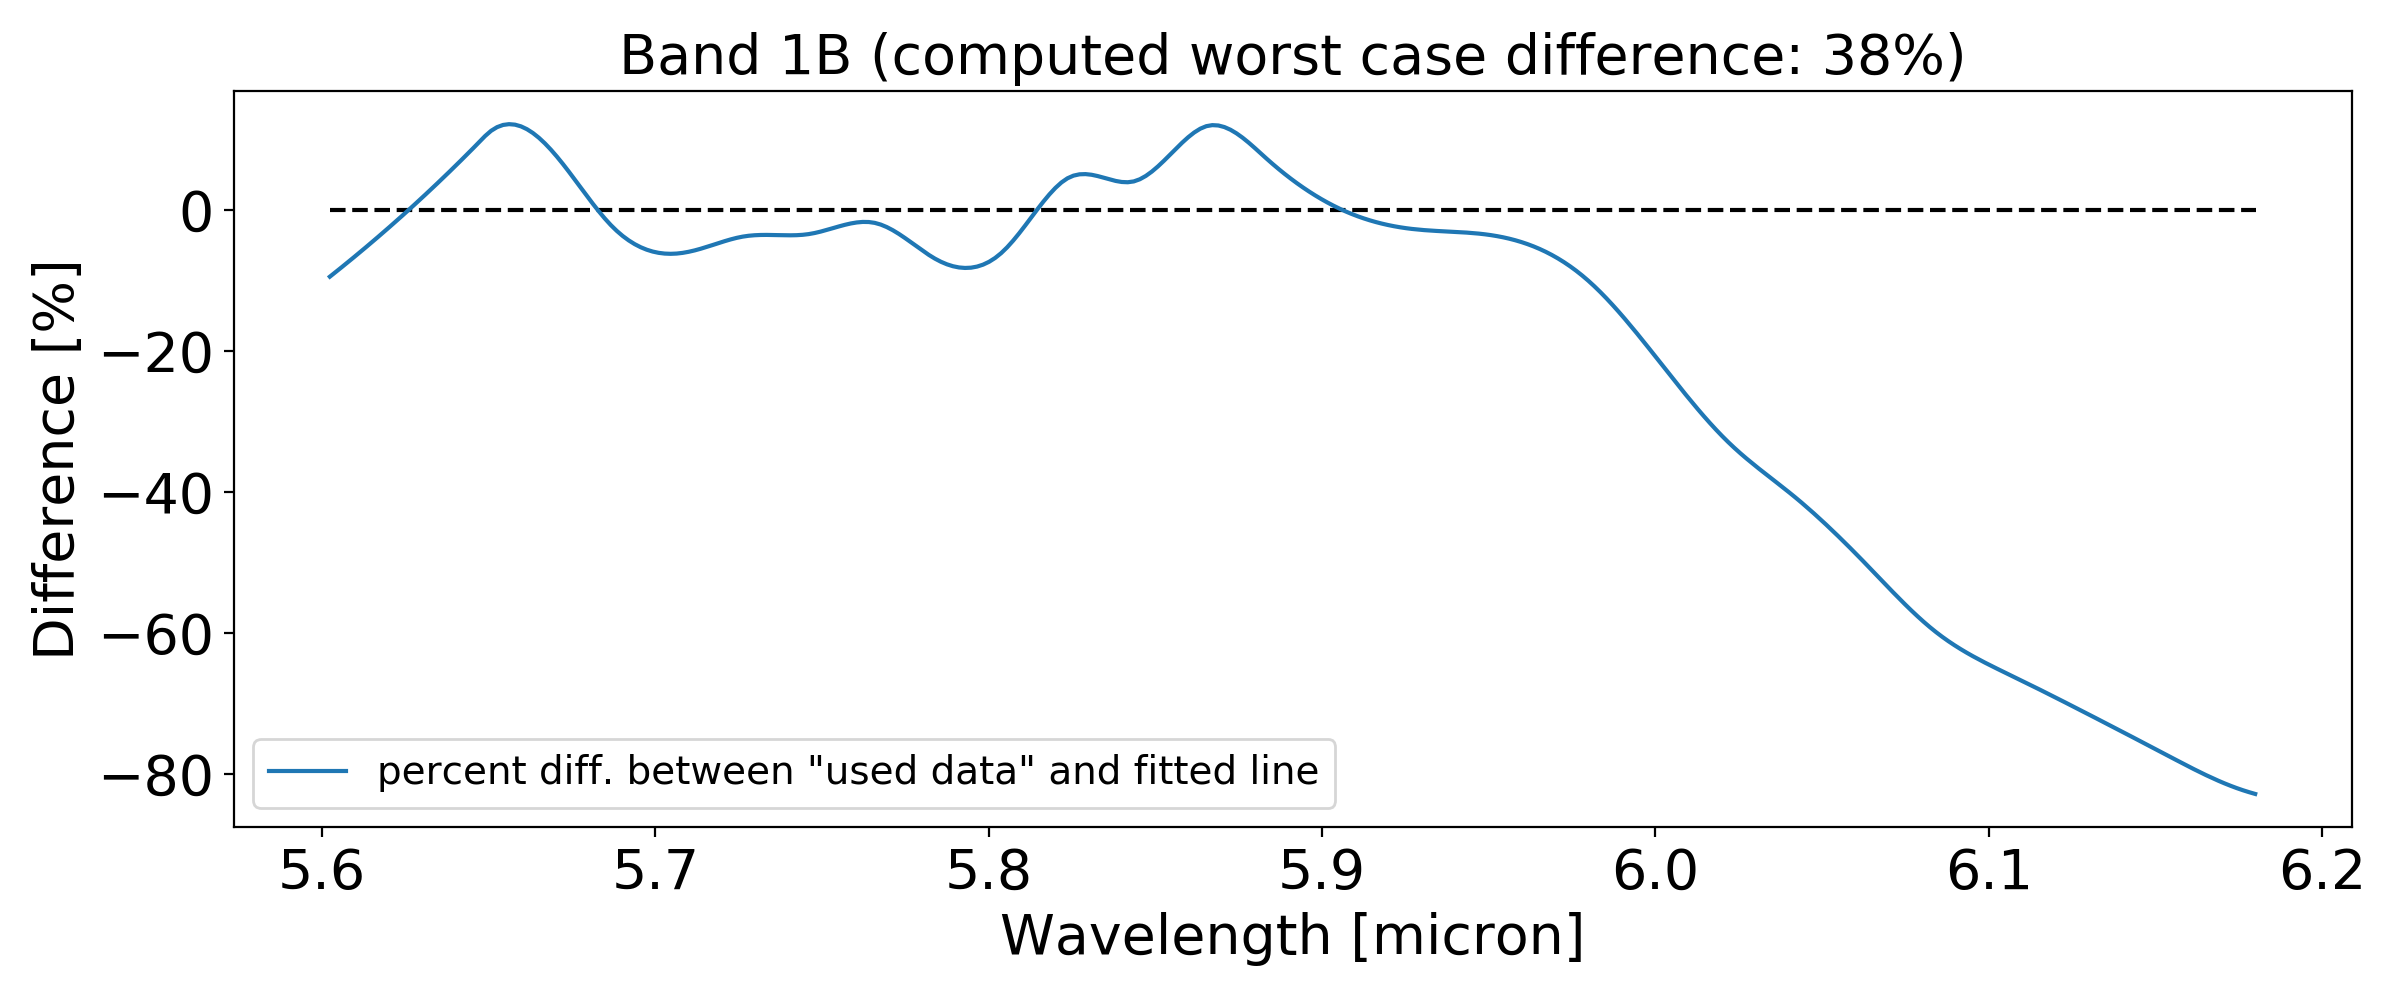

In [23]:
# Examine the OSIM sky flat data in band 1B (wavelength range 5.62-6.73 micron)
band = '1B'
lambdas = lambcens# lambdaMap[band][ypos,xpos[band]]
data = sign_amps # ((img_SCI_1B-img_BKG_1B)/CV2_intcal_source_sci[band])[ypos,xpos[band]]
data_noNaN,peaks,data_profile = funcs.norm_fringe(data,thres=0,min_dist=7,k=3,ext=3)

# plot starter analysis
plt.figure(figsize=(12,5))
plt.title('Band {}'.format(band))
plt.plot(lambdas,data,label='data')
plt.plot(lambdas[peaks],data_noNaN[peaks],'ro',markersize=2,label='fringe peaks')
plt.plot(lambdas,data_profile,label='fringe profile')
plt.hlines(0,lambdas.min(),lambdas.max(),linestyle='dashed')
plt.xlabel('Wavelength [micron]')
plt.ylabel('OSIM target / Cal source')
plt.legend(loc='upper right')
plt.tight_layout()

# Investigate regions of interest
sel = (lambdas <5.97)
popt1     = np.polyfit(lambdas[sel],data_profile[sel],3)
poly1     = np.poly1d(popt1)

sel = (lambdas > 5.972)
popt2     = np.polyfit(lambdas[sel],data_profile[sel],4)
poly2     = np.poly1d(popt2)

# plot resulting fits and residuals
plt.figure(figsize=(12,5))
plt.title('Band {}'.format(band))
plt.plot(lambdas,data,alpha=0.1)
plt.plot(lambdas,data_profile,label='used data')
plt.plot(lambdas[lambdas<6.],poly1(lambdas[lambdas<6.]),label=r'line fitted to $\lambda$<5.97$\mu$m')
plt.plot(lambdas[(lambdas > 5.91)],poly2(lambdas[(lambdas > 5.91)]),label=r'4th order polyfit to $\lambda$>5.97$\mu$m')
plt.hlines(0,lambdas.min(),lambdas.max(),linestyle='dashed')
plt.xlabel('Wavelength [micron]')
plt.ylabel('OSIM target / Cal source')
plt.legend(loc='upper right')
plt.tight_layout()

plt.figure(figsize=(12,5))
plt.title('Band {} (computed worst case difference: 38%)'.format(band))
plt.plot(lambdas[lambdas<6.18],((data_profile-poly1(lambdas))/poly1(lambdas))[lambdas<6.18]*100.,label='percent diff. between "used data" and fitted line')
plt.hlines(0,lambdas.min(),6.18,linestyle='dashed')
plt.xlabel('Wavelength [micron]')
plt.ylabel(r'Difference [%]')
plt.legend(loc='lower left')
plt.tight_layout()

<IPython.core.display.Javascript object>


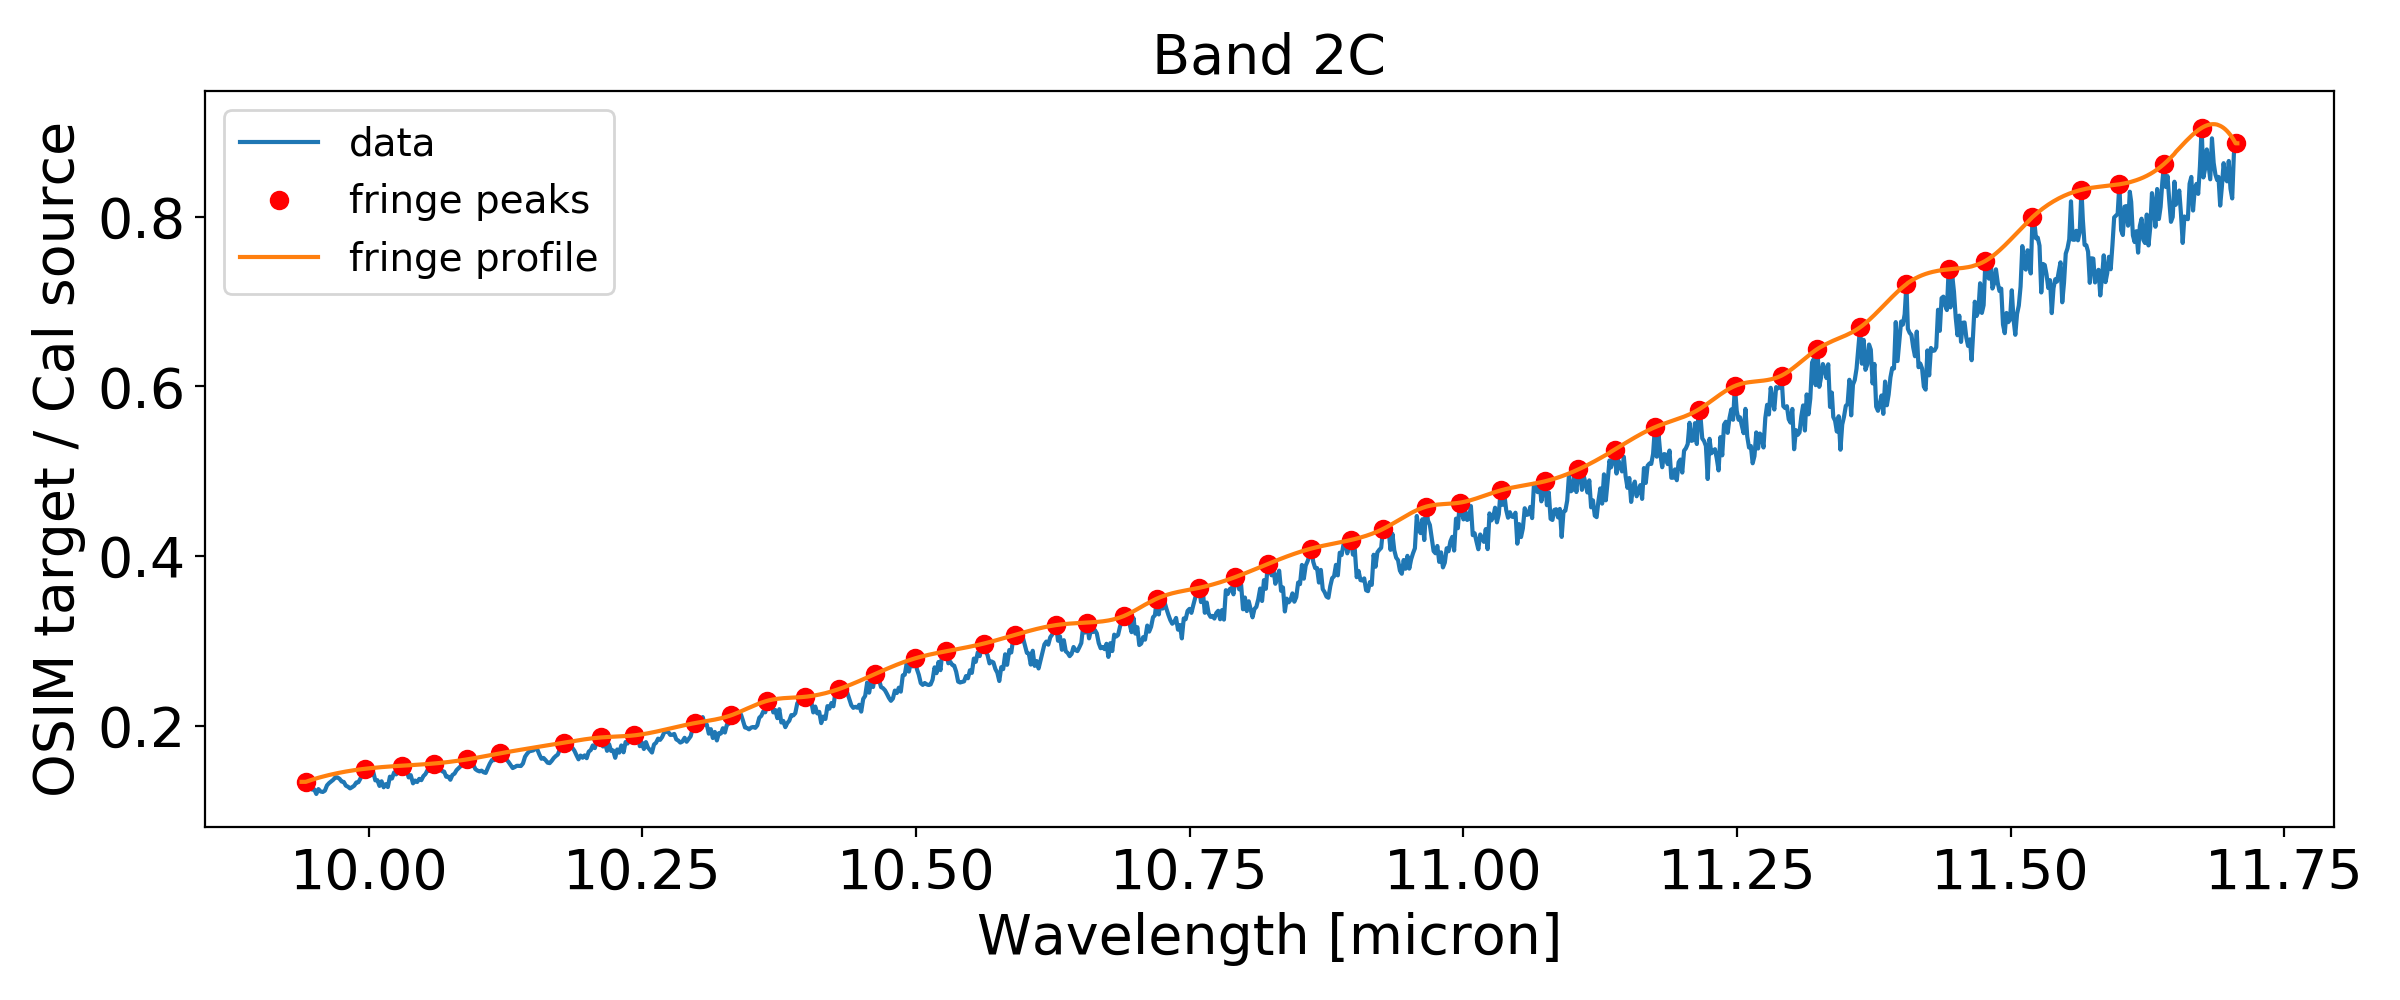

<IPython.core.display.Javascript object>


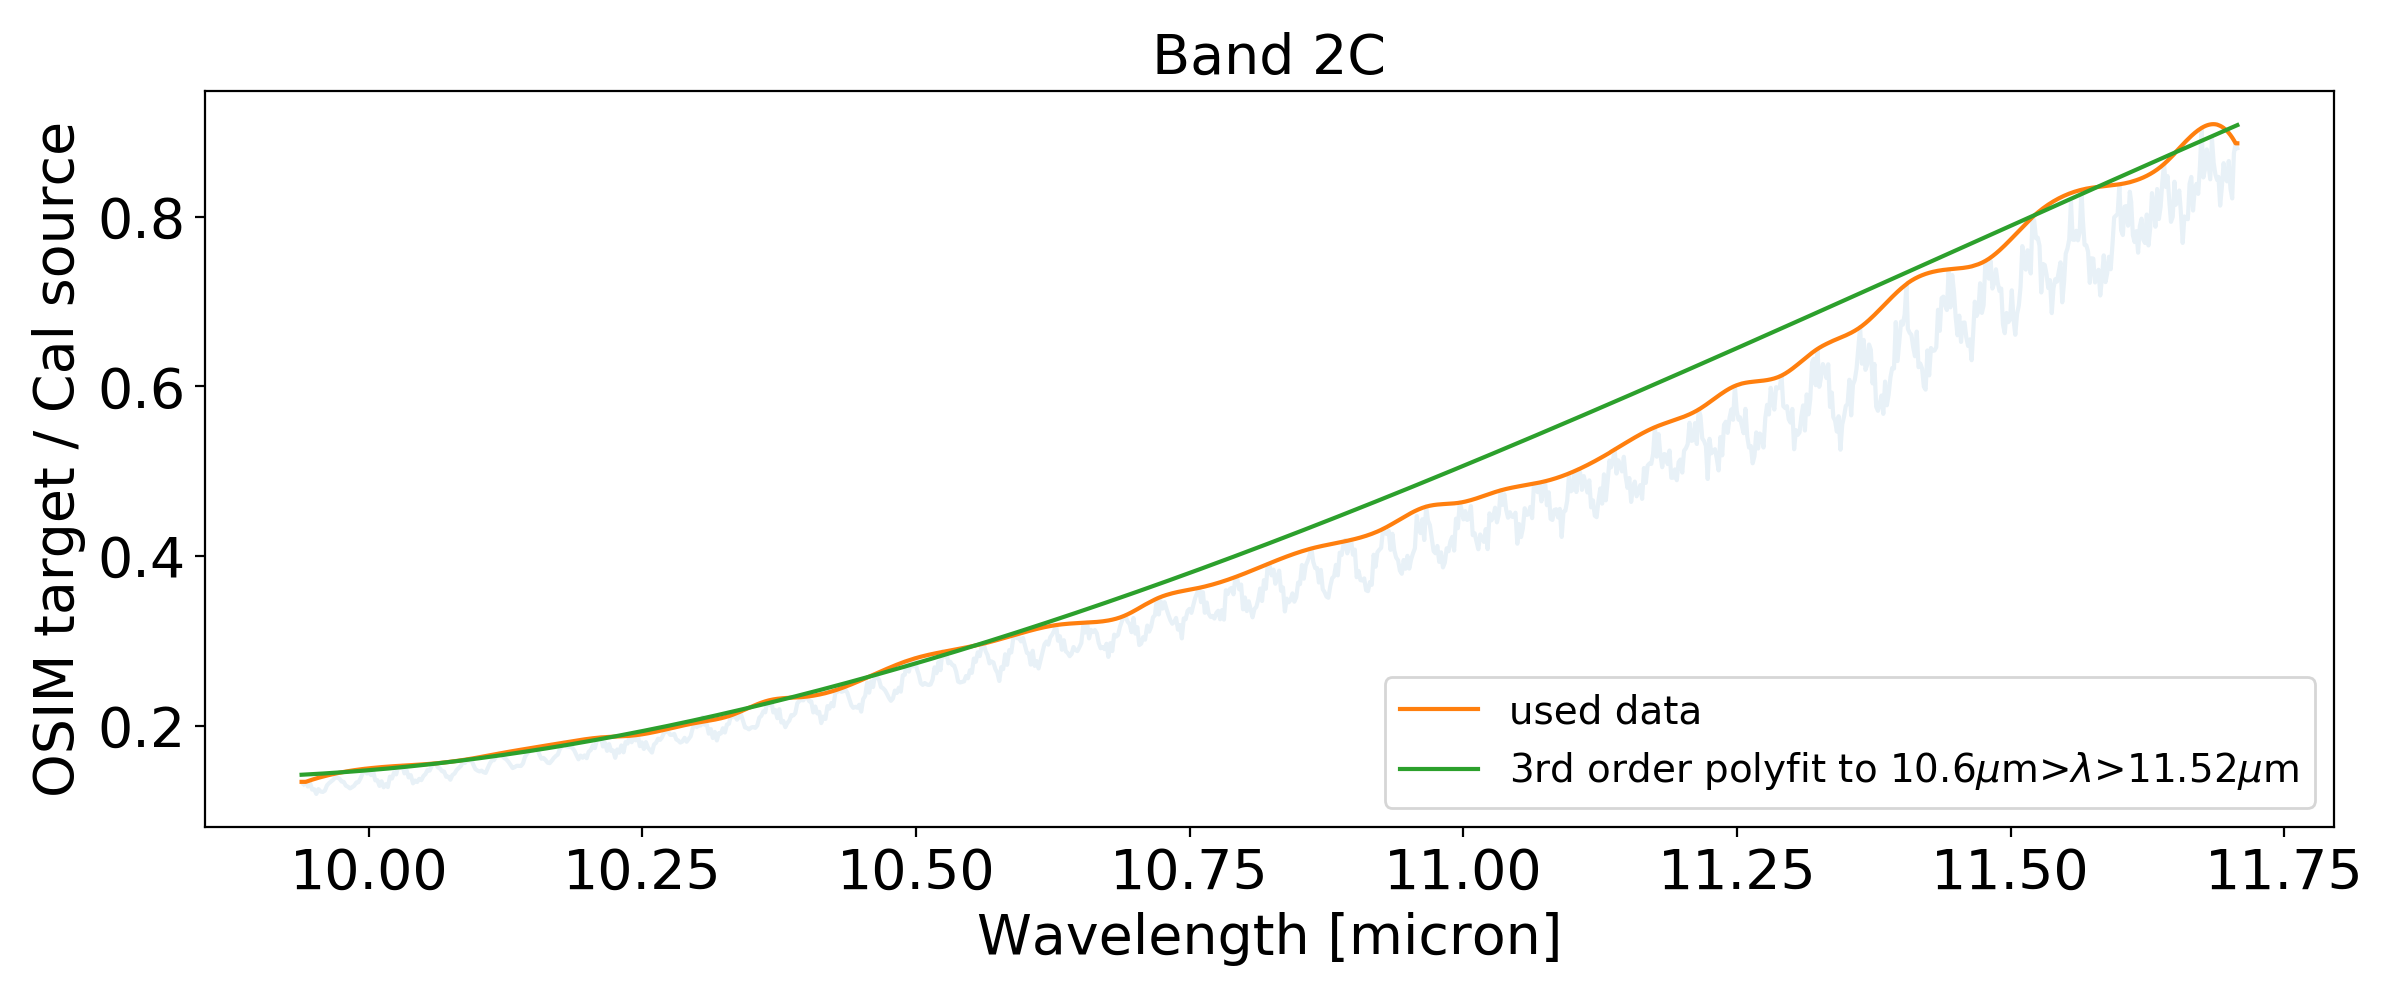

<IPython.core.display.Javascript object>


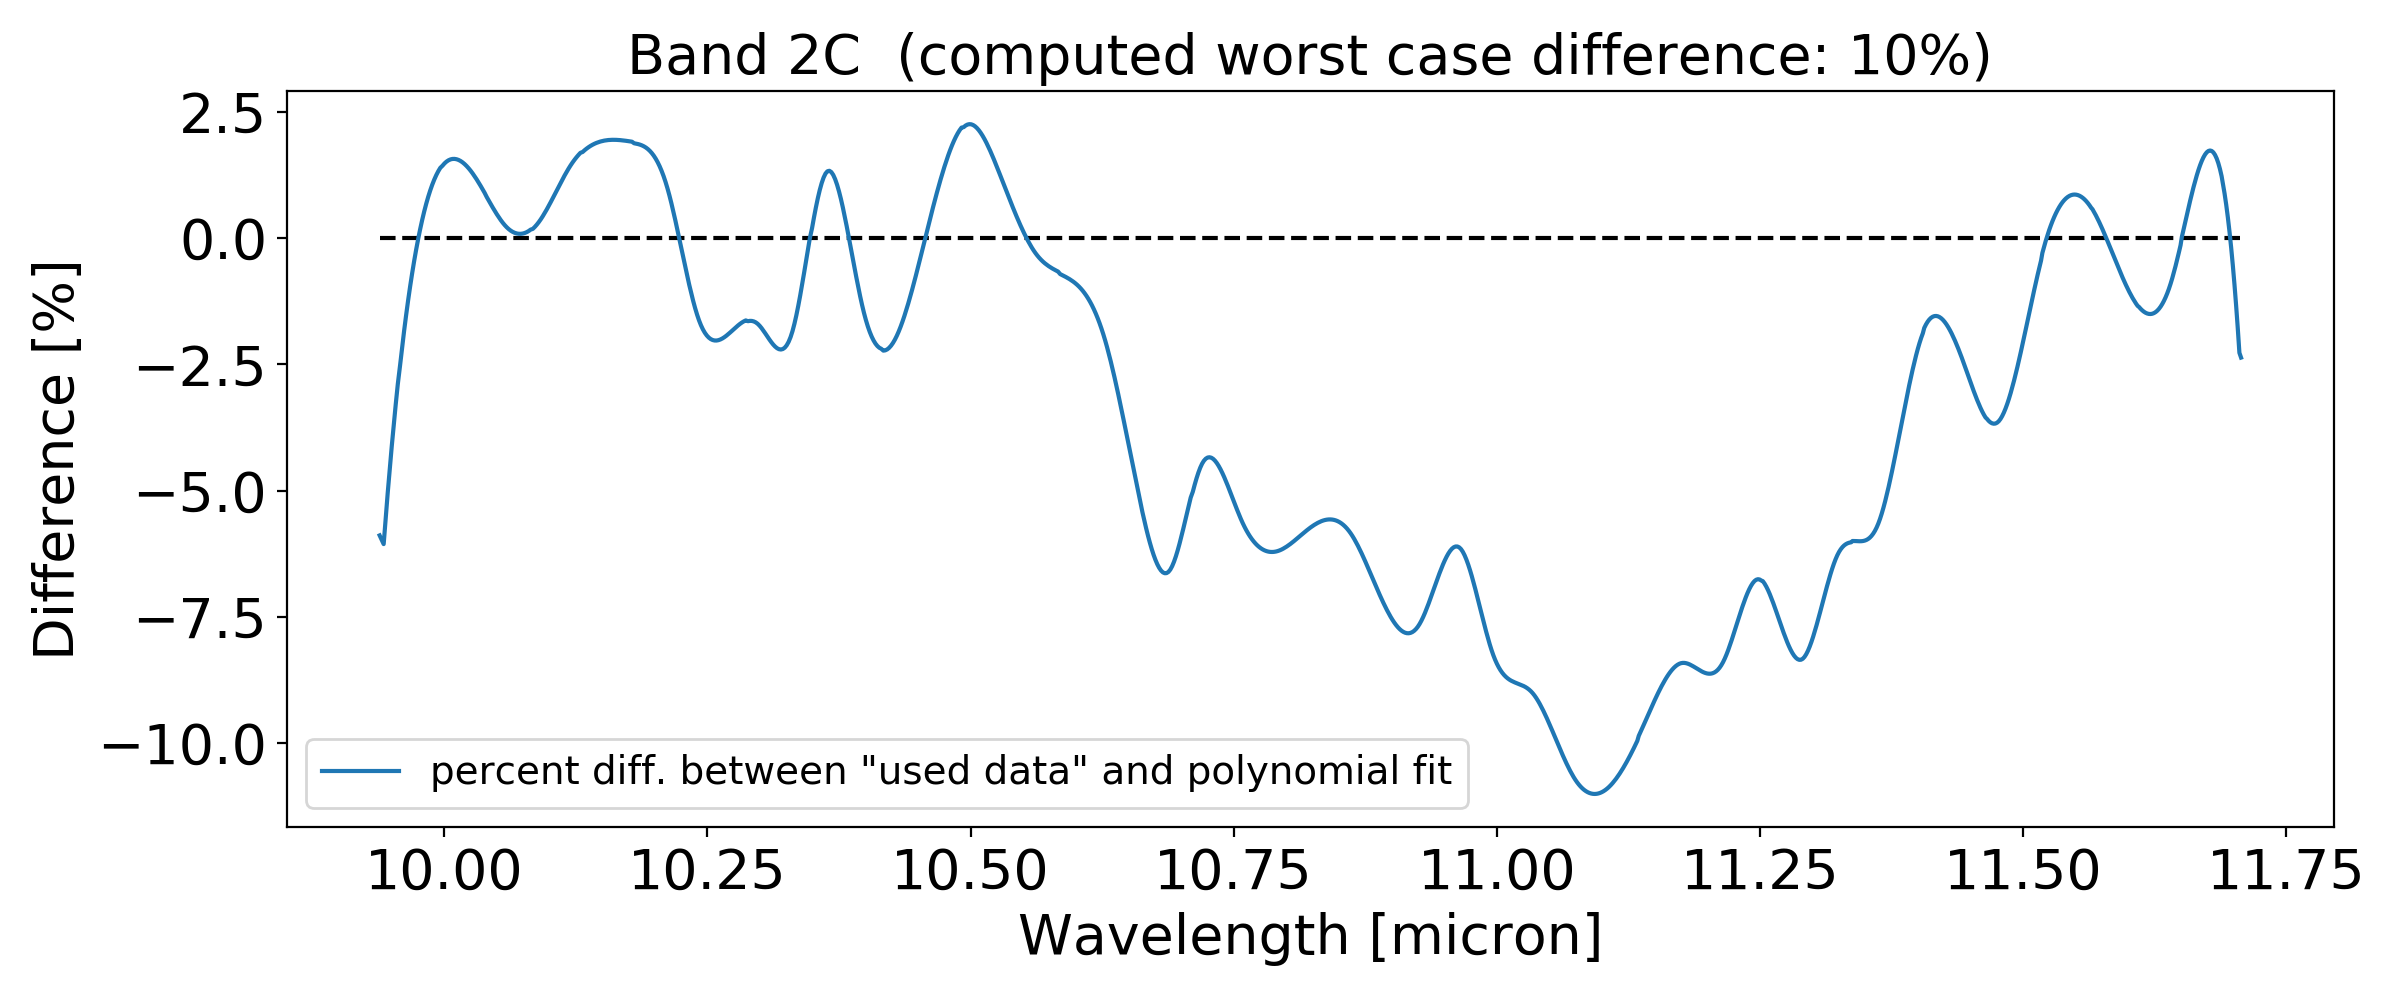

In [6]:
# Examine the OSIM sky flat data in band 2C (wavelength range 9.94-11.87 micron)
band = '2C'
lambdas = lambdaMap[band][ypos,xpos[band]][:-2]
data = (img_SCI_1C/CV2_intcal_source_sci[band])[ypos,xpos[band]][:-2]
data_noNaN,peaks,data_profile = funcs.norm_fringe(data,thres=0,min_dist=14,k=3,ext=3)

# plot starter analysis
plt.figure(figsize=(12,5))
plt.title('Band {}'.format(band))
plt.plot(lambdas,data,label='data')
plt.plot(lambdas[peaks],data_noNaN[peaks],'ro',label='fringe peaks')
plt.plot(lambdas,data_profile,label='fringe profile')
plt.xlabel('Wavelength [micron]')
plt.ylabel('OSIM target / Cal source')
plt.legend(loc='upper left')
plt.tight_layout()

# Investigate region of interest
sel = (lambdas > 10.6) & (lambdas<11.52)
popt1     = np.polyfit(lambdas[~sel],data_profile[~sel],3)
poly1     = np.poly1d(popt1)

# plot resulting fit and residuals
plt.figure(figsize=(12,5))
plt.title('Band {}'.format(band))
plt.plot(lambdas,data,alpha=0.1)
plt.plot(lambdas,data_profile,label='used data')
plt.plot(lambdas,poly1(lambdas),label=r'3rd order polyfit to 10.6$\mu$m>$\lambda$>11.52$\mu$m')
plt.xlabel('Wavelength [micron]')
plt.ylabel('OSIM target / Cal source')
plt.legend(loc='lower right')
plt.tight_layout()

plt.figure(figsize=(12,5))
plt.title('Band {}  (computed worst case difference: 10%)'.format(band))
plt.plot(lambdas,((data_profile-poly1(lambdas))/poly1(lambdas))*100.,label='percent diff. between "used data" and polynomial fit')
plt.hlines(0,lambdas.min(),lambdas.max(),linestyle='dashed')
plt.xlabel('Wavelength [micron]')
plt.ylabel('Difference [%]')
plt.legend(loc='lower left')
plt.tight_layout()

## Check some other bands for potential systematics

<IPython.core.display.Javascript object>


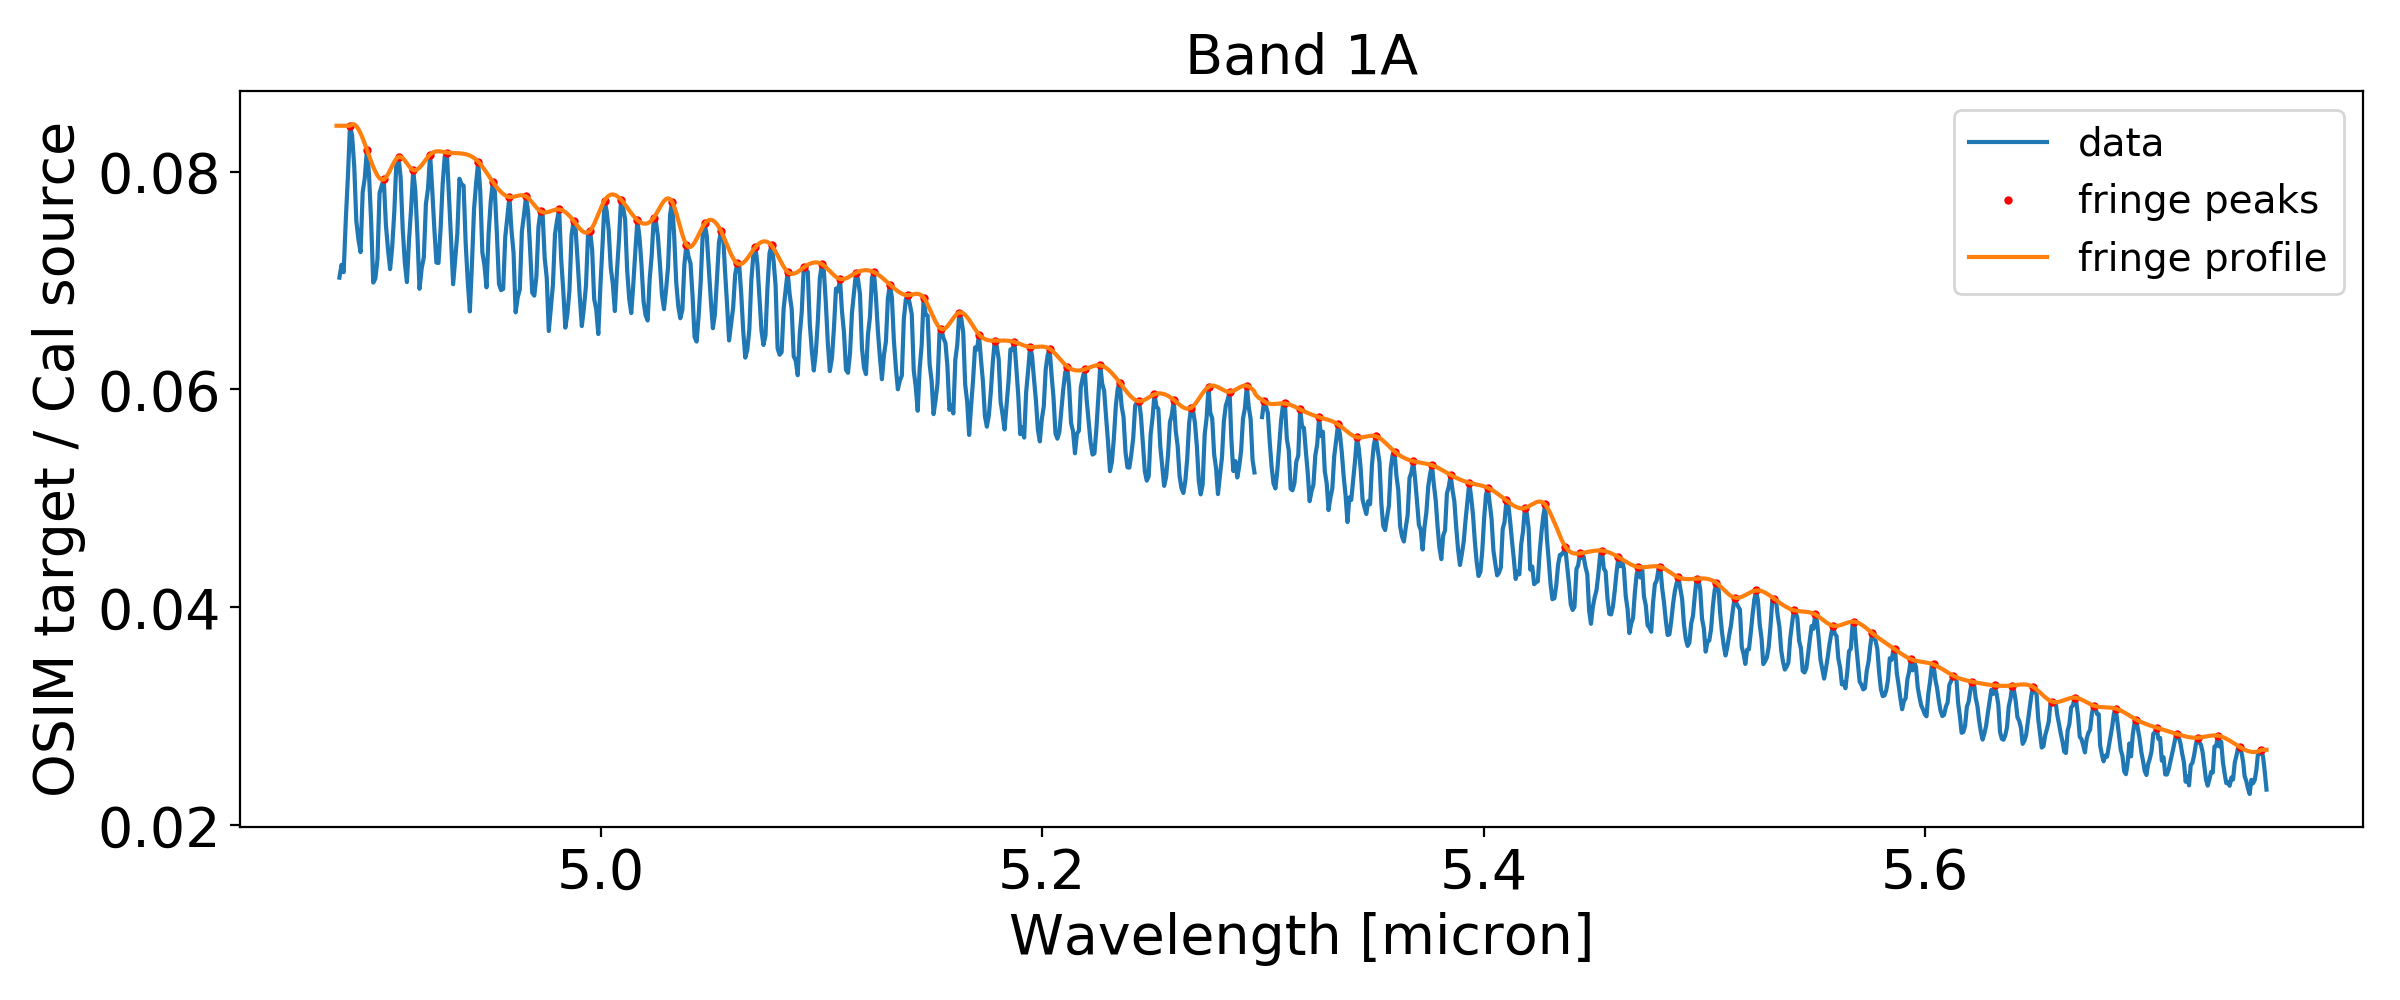

<IPython.core.display.Javascript object>


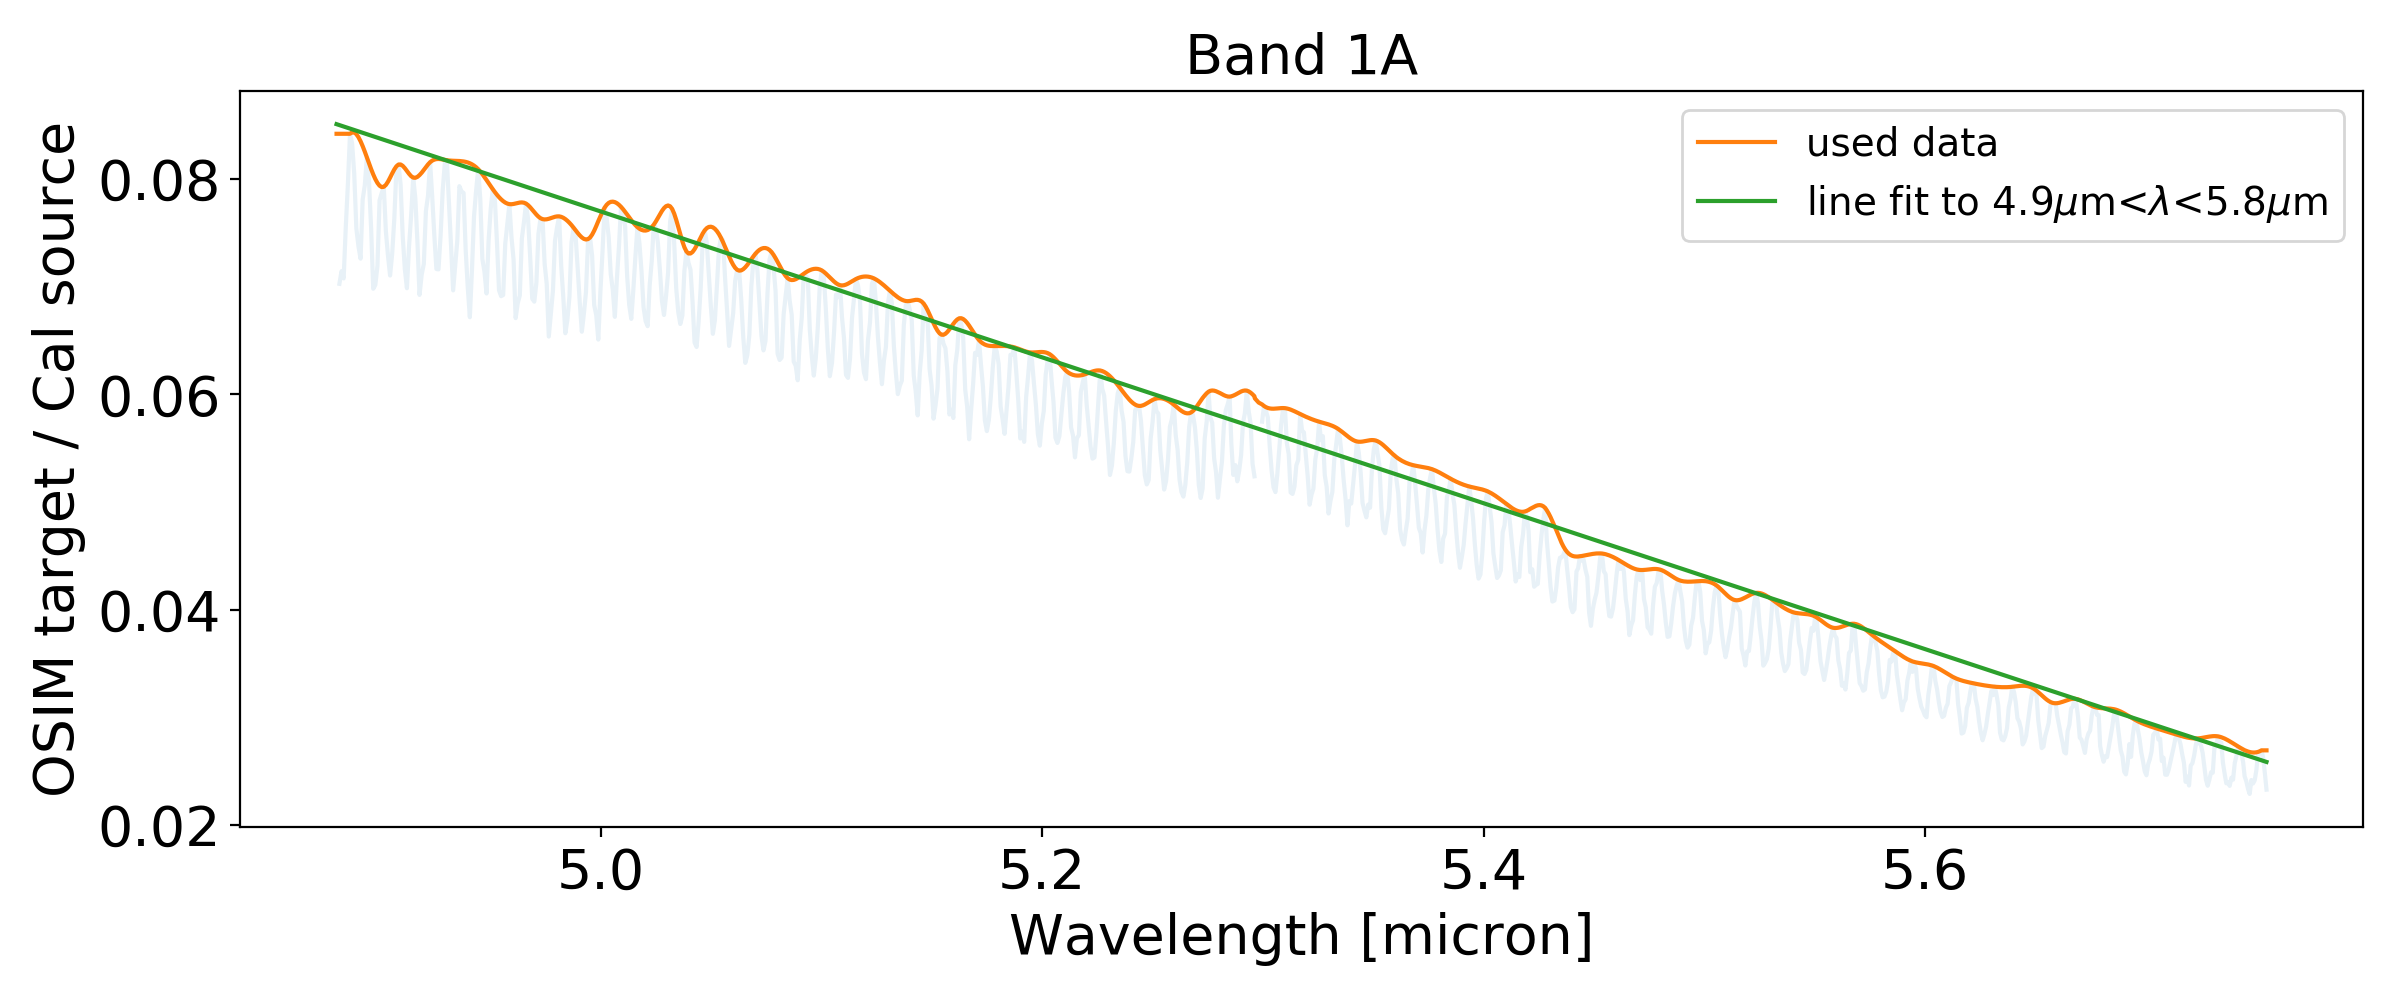

<IPython.core.display.Javascript object>


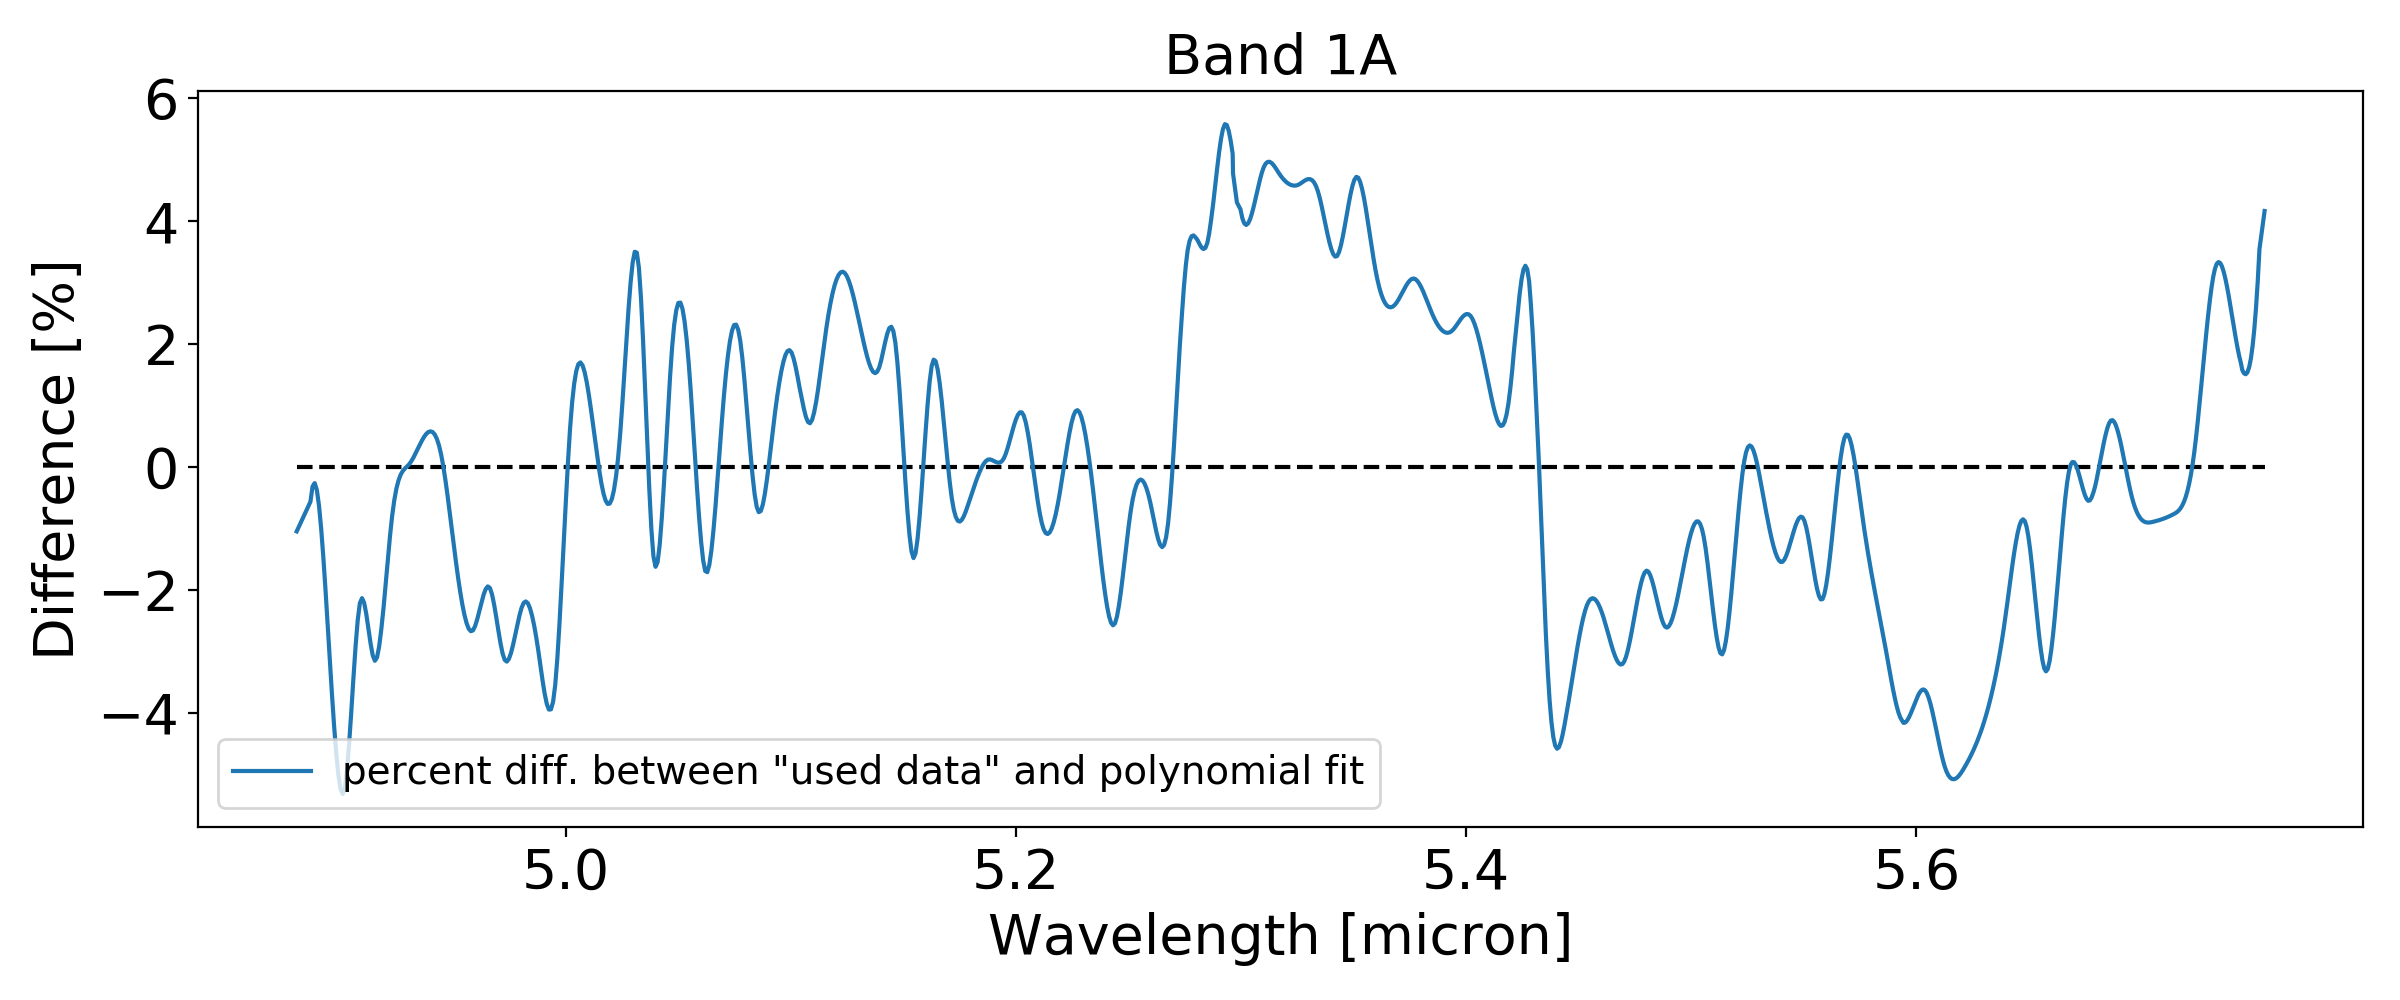

In [8]:
# Examine the OSIM sky flat data in band 1A (wavelength range 4.83-5.82 micron)
band = '1A'
lambdas = lambdaMap[band][ypos,xpos[band]][:-2]
data = ((img_H_1A-img_BKG_1A)/CV2_intcal_source_sci[band])[ypos,xpos[band]][:-2]
data_noNaN,peaks,data_profile = funcs.norm_fringe(data,thres=0,min_dist=6,k=3,ext=3)

# plot starter analysis
plt.figure(figsize=(12,5))
plt.title('Band {}'.format(band))
plt.plot(lambdas,data,label='data')
plt.plot(lambdas[peaks],data_noNaN[peaks],'ro',markersize=2,label='fringe peaks')
plt.plot(lambdas,data_profile,label='fringe profile')
plt.xlabel('Wavelength [micron]')
plt.ylabel('OSIM target / Cal source')
plt.legend(loc='upper right')
plt.tight_layout()

# Investigate region of interest
popt1     = np.polyfit(lambdas,data_profile,1)
poly1     = np.poly1d(popt1)

# plot resulting fit and residuals
plt.figure(figsize=(12,5))
plt.title('Band {}'.format(band))
plt.plot(lambdas,data,alpha=0.1)
plt.plot(lambdas,data_profile,label='used data')
plt.plot(lambdas,poly1(lambdas),label=r'line fit to {}$\mu$m<$\lambda$<{}$\mu$m'.format(round(lambdas.min(),1),round(lambdas.max(),1) ))
plt.xlabel('Wavelength [micron]')
plt.ylabel('OSIM target / Cal source')
plt.legend(loc='upper right')
plt.tight_layout()

plt.figure(figsize=(12,5))
plt.title('Band {}'.format(band))
plt.plot(lambdas,((data_profile-poly1(lambdas))/poly1(lambdas))*100.,label='percent diff. between "used data" and polynomial fit')
plt.hlines(0,lambdas.min(),lambdas.max(),linestyle='dashed')
plt.xlabel('Wavelength [micron]')
plt.ylabel('Difference [%]')
plt.legend(loc='lower left')
plt.tight_layout()

<IPython.core.display.Javascript object>


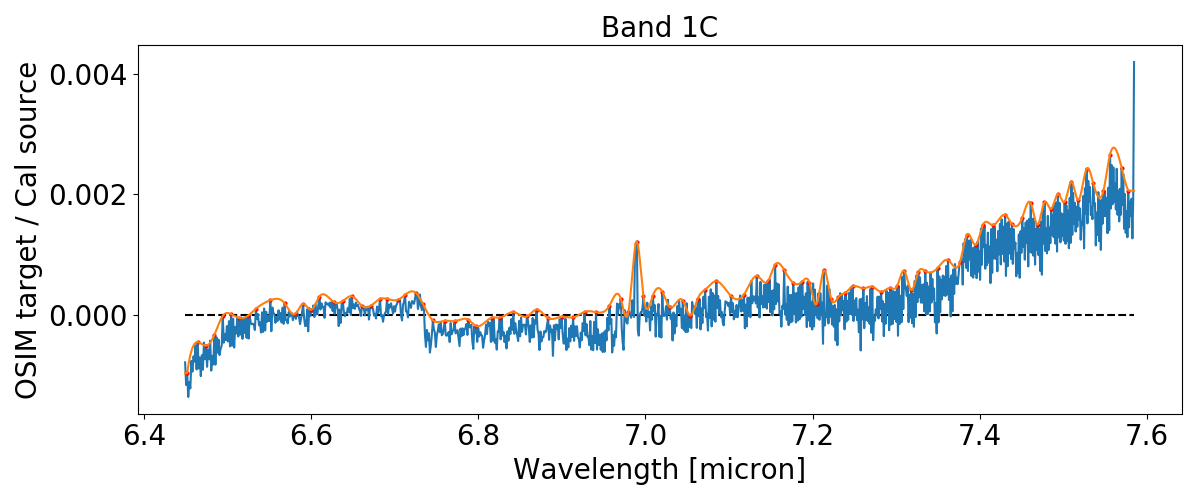

<IPython.core.display.Javascript object>


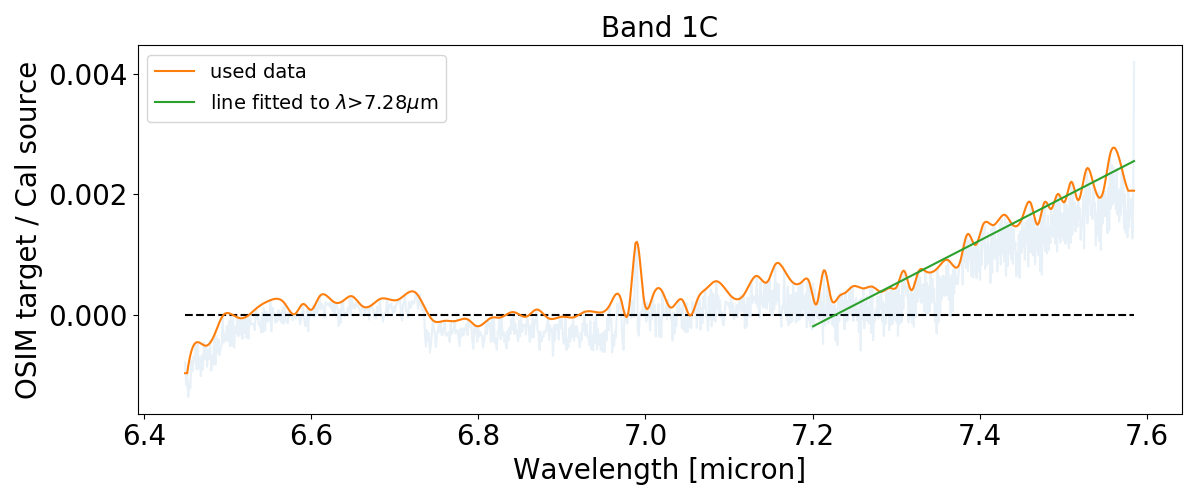

<IPython.core.display.Javascript object>


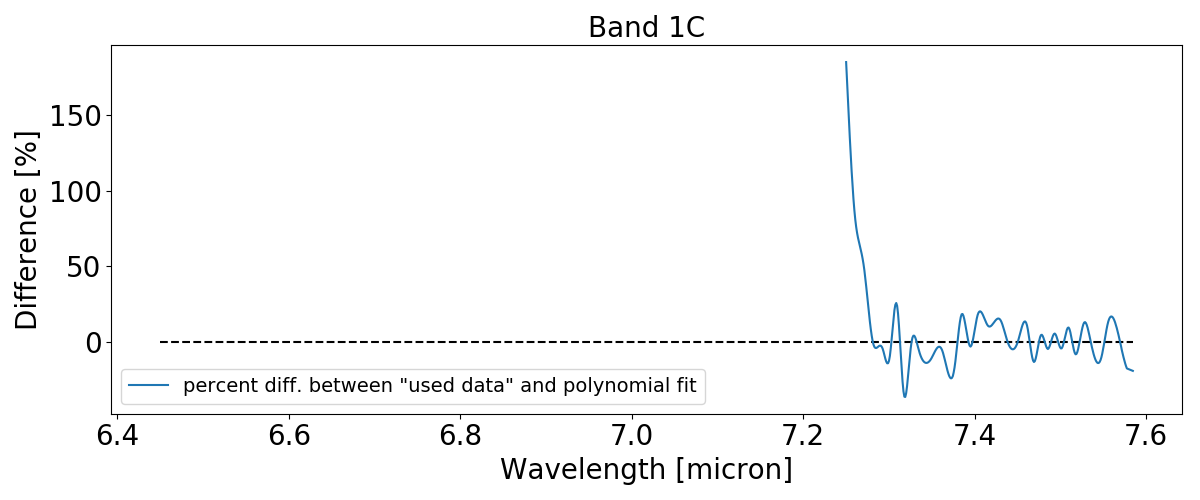

In [31]:
# Examine the OSIM sky flat data in band 1C (wavelength range 6.46,7.76 micron)
band = '1C'
lambdas = lambdaMap[band][ypos,xpos[band]][5:-2]
data = (img_H_1C/CV2_intcal_source_sci[band])[ypos,xpos[band]][5:-2]
data_noNaN,peaks,data_profile = funcs.norm_fringe(data,thres=0,min_dist=6,k=3,ext=3)

# plot starter analysis
plt.figure(figsize=(12,5))
plt.title('Band {}'.format(band))
plt.plot(lambdas,data,label='data')
plt.plot(lambdas[peaks],data_noNaN[peaks],'ro',markersize=2,label='fringe peaks')
plt.plot(lambdas,data_profile,label='fringe profile')
plt.hlines(0,lambdas.min(),lambdas.max(),linestyle='dashed')
plt.xlabel('Wavelength [micron]')
plt.ylabel('OSIM target / Cal source')
# plt.legend(loc='upper left')
plt.tight_layout()

# Investigate region of interest
sel = (lambdas>7.28)
popt1     = np.polyfit(lambdas[sel],data_profile[sel],1)
poly1     = np.poly1d(popt1)

# plot resulting fit and residuals
plt.figure(figsize=(12,5))
plt.title('Band {}'.format(band))
plt.plot(lambdas,data,alpha=0.1)
plt.plot(lambdas,data_profile,label='used data')
plt.plot(lambdas[(lambdas>7.2)],poly1(lambdas)[(lambdas>7.2)],label=r'line fitted to $\lambda$>7.28$\mu$m')
plt.hlines(0,lambdas.min(),lambdas.max(),linestyle='dashed')
plt.xlabel('Wavelength [micron]')
plt.ylabel('OSIM target / Cal source')
plt.legend(loc='upper left')
plt.tight_layout()

plt.figure(figsize=(12,5))
plt.title('Band {}'.format(band))
plt.plot(lambdas[(lambdas>7.25)],((data_profile-poly1(lambdas))/poly1(lambdas))[(lambdas>7.25)]*100.,label='percent diff. between "used data" and polynomial fit')
plt.hlines(0,lambdas.min(),lambdas.max(),linestyle='dashed')
plt.xlabel('Wavelength [micron]')
plt.ylabel('Difference [%]')
plt.legend(loc='lower left')
plt.tight_layout()

<IPython.core.display.Javascript object>


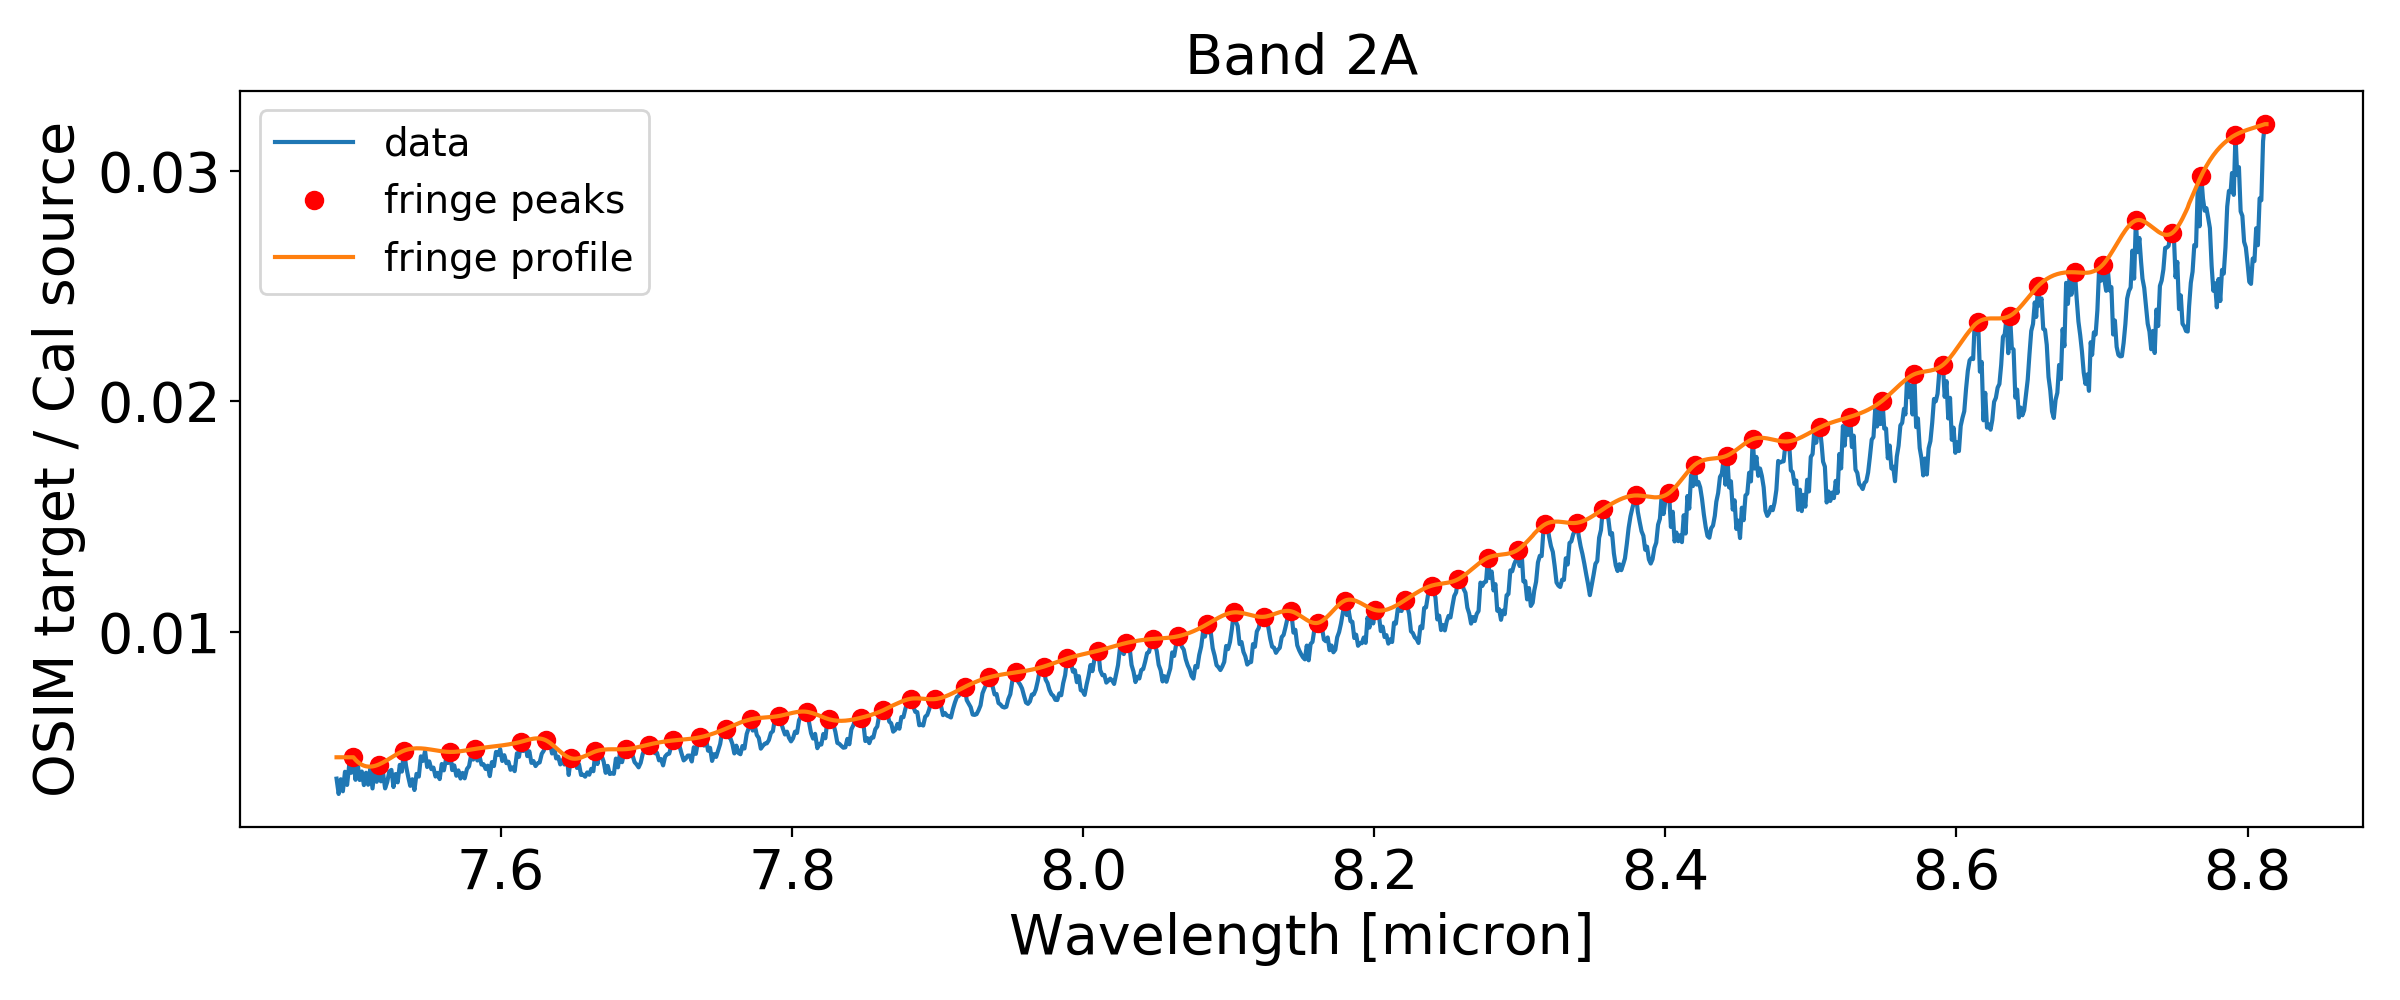

<IPython.core.display.Javascript object>


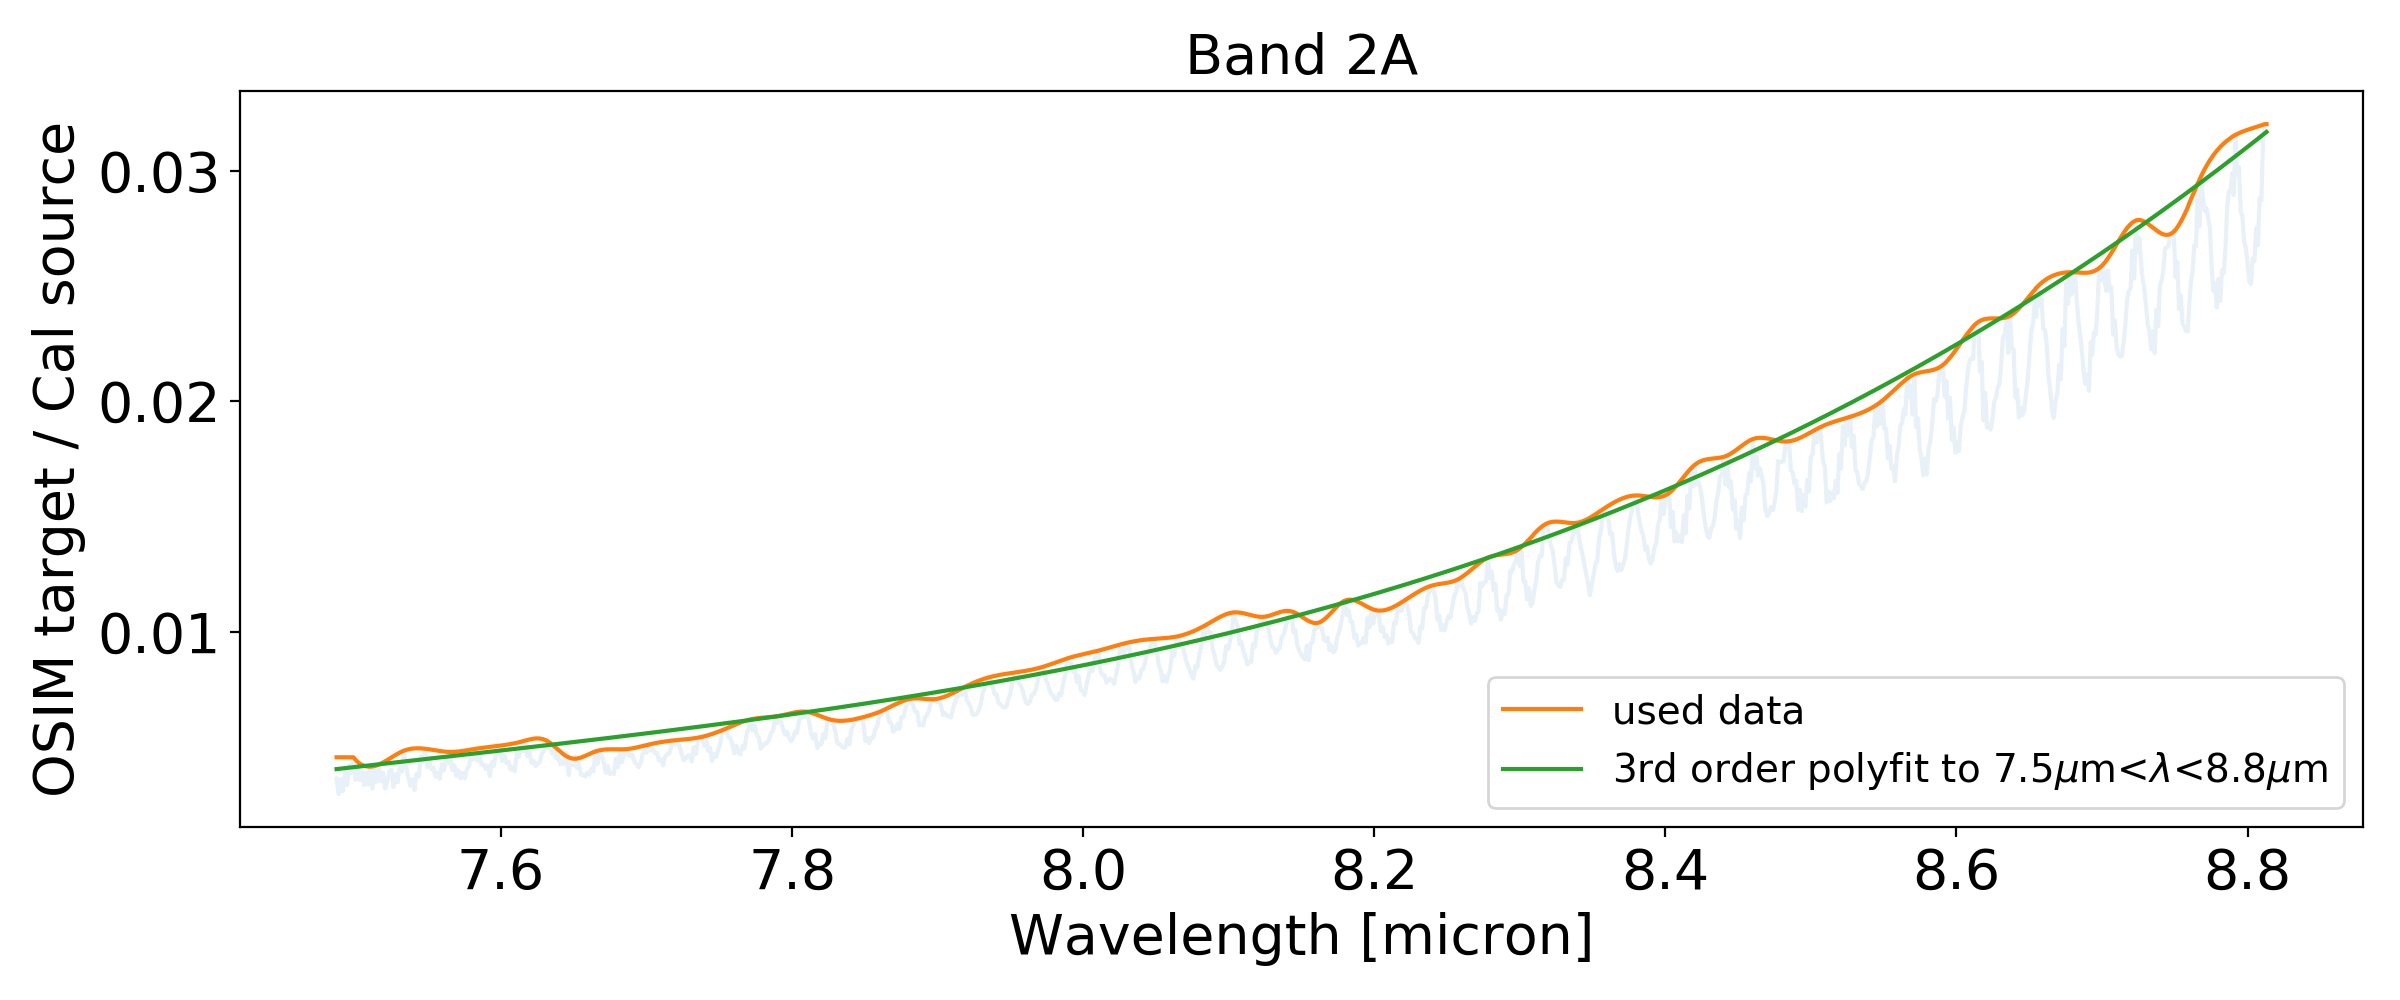

<IPython.core.display.Javascript object>


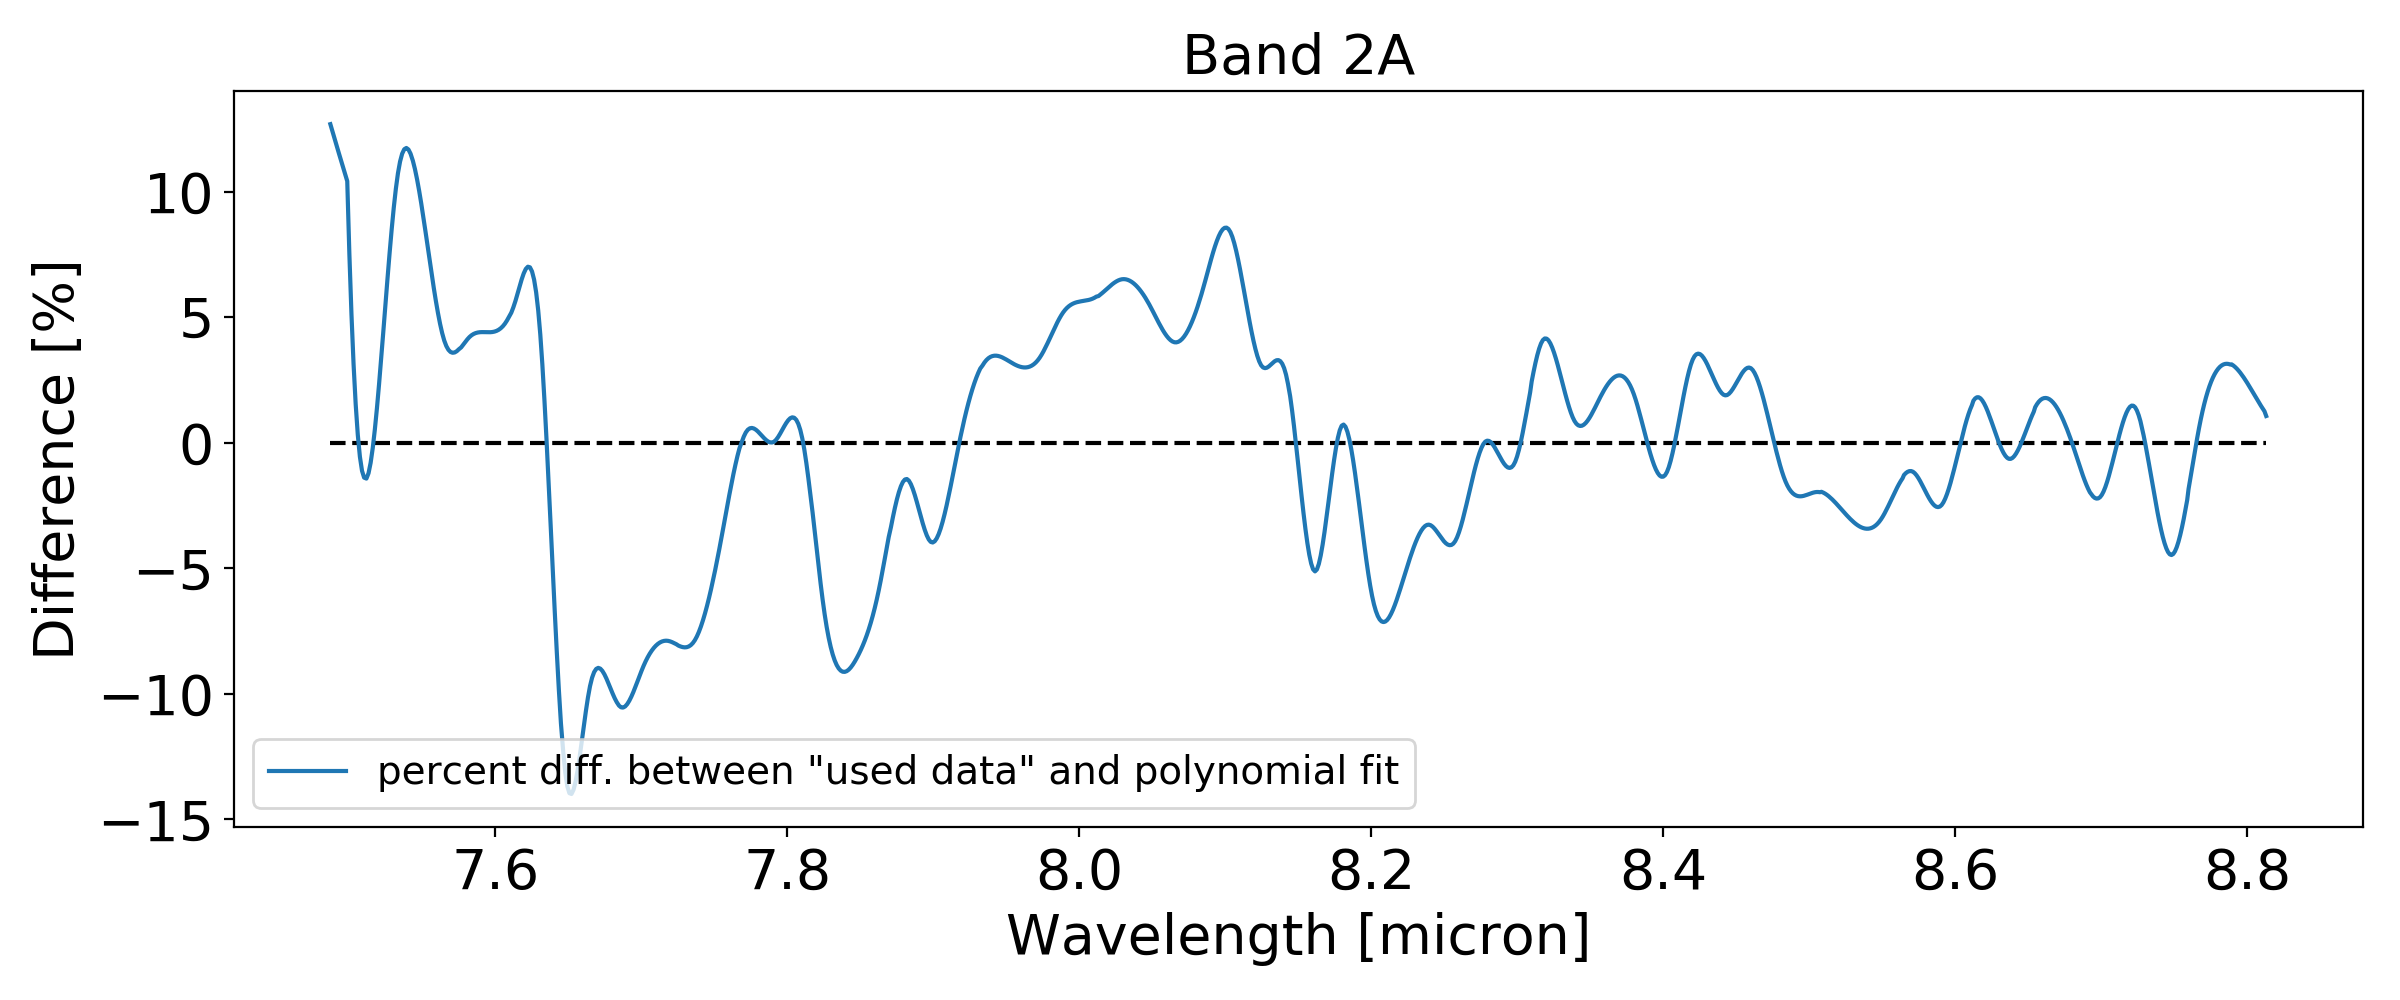

In [17]:
# Examine the OSIM sky flat data in band 2A (wavelength range 7.44-8.90 micron)
band = '2A'
lambdas = lambdaMap[band][ypos,xpos[band]][5:-3]
data = (img_H_1A/CV2_intcal_source_sci[band])[ypos,xpos[band]][5:-3]
data_noNaN,peaks,data_profile = funcs.norm_fringe(data,thres=0,min_dist=10,k=3,ext=3)

# plot starter analysis
plt.figure(figsize=(12,5))
plt.title('Band {}'.format(band))
plt.plot(lambdas,data,label='data')
plt.plot(lambdas[peaks],data_noNaN[peaks],'ro',label='fringe peaks')
plt.plot(lambdas,data_profile,label='fringe profile')
plt.xlabel('Wavelength [micron]')
plt.ylabel('OSIM target / Cal source')
plt.legend(loc='upper left')
plt.tight_layout()

# Investigate region of interest
popt1     = np.polyfit(lambdas,data_profile,3)
poly1     = np.poly1d(popt1)

# plot resulting fit and residuals
plt.figure(figsize=(12,5))
plt.title('Band {}'.format(band))
plt.plot(lambdas,data,alpha=0.1)
plt.plot(lambdas,data_profile,label='used data')
plt.plot(lambdas,poly1(lambdas),label=r'3rd order polyfit to {}$\mu$m<$\lambda$<{}$\mu$m'.format(round(lambdas.min(),1),round(lambdas.max(),1)))
plt.xlabel('Wavelength [micron]')
plt.ylabel('OSIM target / Cal source')
plt.legend(loc='lower right')
plt.tight_layout()

plt.figure(figsize=(12,5))
plt.title('Band {}'.format(band))
plt.plot(lambdas,((data_profile-poly1(lambdas))/poly1(lambdas))*100.,label='percent diff. between "used data" and polynomial fit')
plt.hlines(0,lambdas.min(),lambdas.max(),linestyle='dashed')
plt.xlabel('Wavelength [micron]')
plt.ylabel('Difference [%]')
plt.legend(loc='lower left')
plt.tight_layout()

<IPython.core.display.Javascript object>


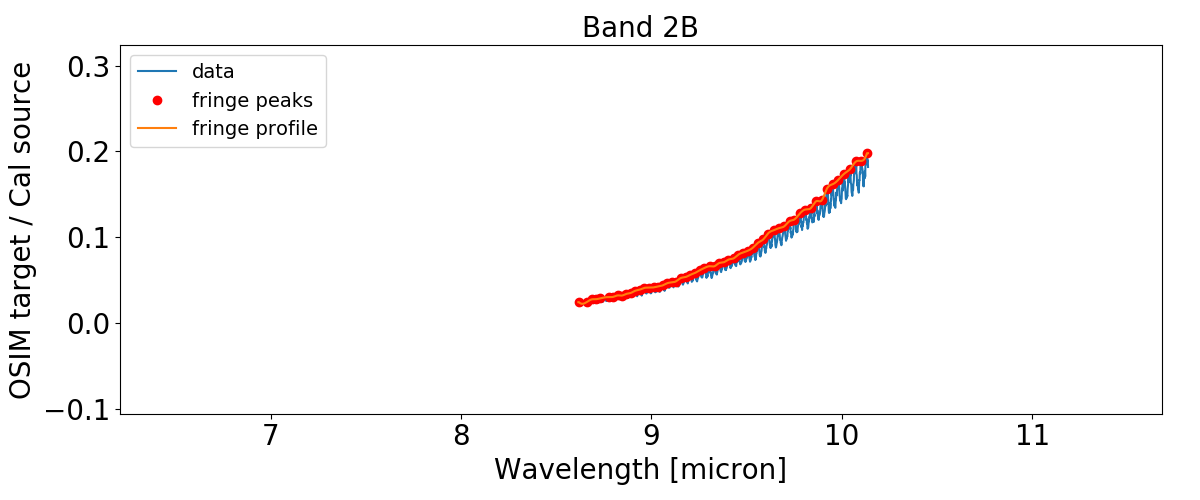

<IPython.core.display.Javascript object>


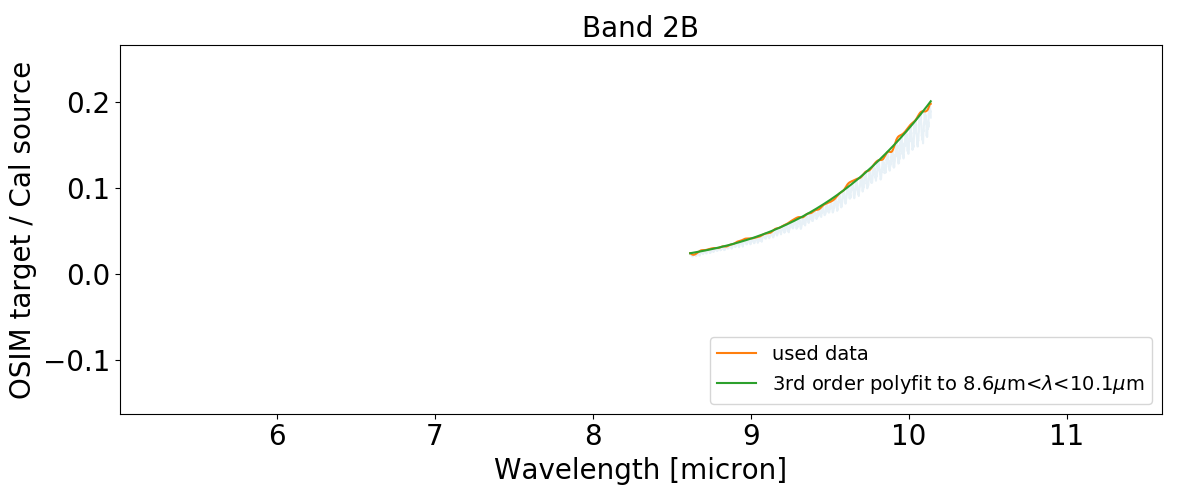

<IPython.core.display.Javascript object>


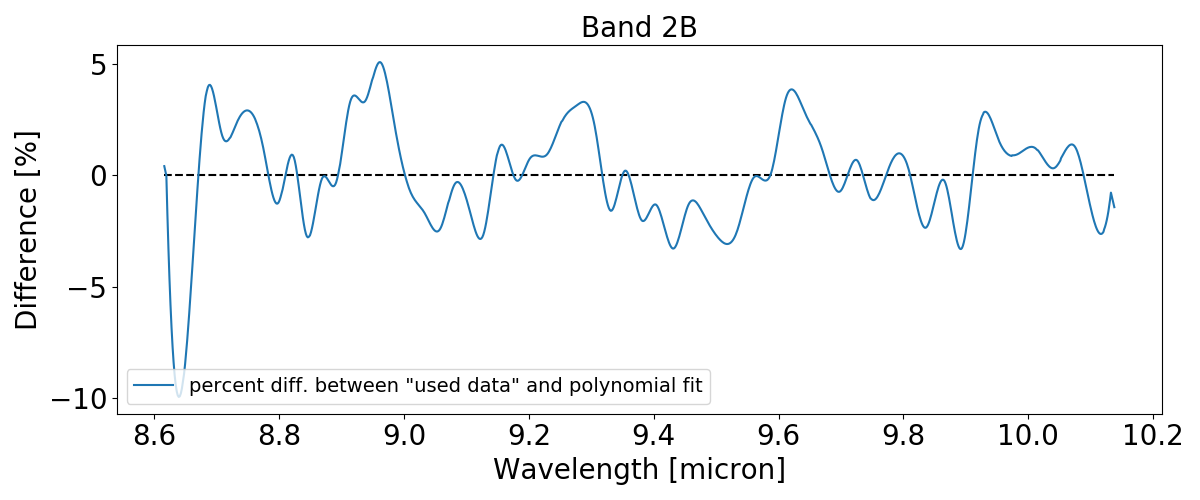

In [34]:
# Examine the OSIM sky flat data in band 2A (wavelength range 7.44-8.90 micron)
band = '2B'
lambdas = lambdaMap[band][ypos,xpos[band]][5:-3]
data = (img_H_1B/CV2_intcal_source_sci[band])[ypos,xpos[band]][5:-3]
data_noNaN,peaks,data_profile = funcs.norm_fringe(data,thres=0,min_dist=12,k=3,ext=3)

# plot starter analysis
plt.figure(figsize=(12,5))
plt.title('Band {}'.format(band))
plt.plot(lambdas,data,label='data')
plt.plot(lambdas[peaks],data_noNaN[peaks],'ro',label='fringe peaks')
plt.plot(lambdas,data_profile,label='fringe profile')
plt.xlabel('Wavelength [micron]')
plt.ylabel('OSIM target / Cal source')
plt.legend(loc='upper left')
plt.tight_layout()

# Investigate region of interest
popt1     = np.polyfit(lambdas,data_profile,3)
poly1     = np.poly1d(popt1)

# plot resulting fit and residuals
plt.figure(figsize=(12,5))
plt.title('Band {}'.format(band))
plt.plot(lambdas,data,alpha=0.1)
plt.plot(lambdas,data_profile,label='used data')
plt.plot(lambdas,poly1(lambdas),label=r'3rd order polyfit to {}$\mu$m<$\lambda$<{}$\mu$m'.format(round(lambdas.min(),1),round(lambdas.max(),1)))
plt.xlabel('Wavelength [micron]')
plt.ylabel('OSIM target / Cal source')
plt.legend(loc='lower right')
plt.tight_layout()

plt.figure(figsize=(12,5))
plt.title('Band {}'.format(band))
plt.plot(lambdas,((data_profile-poly1(lambdas))/poly1(lambdas))*100.,label='percent diff. between "used data" and polynomial fit')
plt.hlines(0,lambdas.min(),lambdas.max(),linestyle='dashed')
plt.xlabel('Wavelength [micron]')
plt.ylabel('Difference [%]')
plt.legend(loc='lower left')
plt.tight_layout()